In [79]:
import pandas as pd
import numpy as np
from numpy import mean, std
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut,GridSearchCV, cross_val_score, cross_val_predict, train_test_split,StratifiedKFold, LeavePOut
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.covariance import EmpiricalCovariance
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
import warnings


warnings.filterwarnings('ignore')

In [80]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [81]:
data_pzt5 = pd.read_csv('PZT5 MALZEME DEGİSİMİ-NZ2_14 İCİN.csv')
data = data_pzt5.iloc[:, :2]
data

,ynz2_14_fi_x1_izort (koordinat),ynz2_14_fi_x1_imort
0,0.0,0.0
1,0.5,0.0
2,1.0,0.0
3,1.5,0.0
4,2.0,0.0
...,...,...
14989,NaN,NaN
14990,NaN,NaN
14991,NaN,NaN
14992,NaN,NaN


### verideki NaN değerleri çıkartmak için kontrol sağlanıp değer olan kısımlar sadece alındı.

In [82]:
data = data.head(220) 
data

,ynz2_14_fi_x1_izort (koordinat),ynz2_14_fi_x1_imort
0,0.0,0.000000e+00
1,0.5,0.000000e+00
2,1.0,0.000000e+00
3,1.5,0.000000e+00
4,2.0,0.000000e+00
5,2.5,0.000000e+00
6,3.0,0.000000e+00
7,3.5,0.000000e+00
8,4.0,0.000000e+00
9,4.5,0.000000e+00


In [83]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [84]:
data.isna().any()

ynz2_14_fi_x1_izort (koordinat)    False
ynz2_14_fi_x1_imort                False
dtype: bool

### boş veri açısından bir problem artık yok.

In [85]:
data.describe()

,ynz2_14_fi_x1_izort (koordinat),ynz2_14_fi_x1_imort
count,220.000000,2.200000e+02
mean,50.000000,4.198194e-01
std,28.940578,3.677391e-01
min,0.000000,-1.240000e-08
25%,25.000000,0.000000e+00
50%,50.000000,7.202890e-01
75%,75.000000,7.494928e-01
max,100.000000,8.328374e-01


# İlk satırdaki değerleri /100 olarak yapmam gerekli.

In [86]:
data['ynz2_14_fi_x1_izort (koordinat)'] = data['ynz2_14_fi_x1_izort (koordinat)'] / 100
data

,ynz2_14_fi_x1_izort (koordinat),ynz2_14_fi_x1_imort
0,0.000,0.000000e+00
1,0.005,0.000000e+00
2,0.010,0.000000e+00
3,0.015,0.000000e+00
4,0.020,0.000000e+00
5,0.025,0.000000e+00
6,0.030,0.000000e+00
7,0.035,0.000000e+00
8,0.040,0.000000e+00
9,0.045,0.000000e+00


In [87]:
data.describe()

,ynz2_14_fi_x1_izort (koordinat),ynz2_14_fi_x1_imort
count,220.000000,2.200000e+02
mean,0.500000,4.198194e-01
std,0.289406,3.677391e-01
min,0.000000,-1.240000e-08
25%,0.250000,0.000000e+00
50%,0.500000,7.202890e-01
75%,0.750000,7.494928e-01
max,1.000000,8.328374e-01


### işlemler başarıyla halledildi. 

In [88]:
data.ynz2_14_fi_x1_imort.value_counts()

 0.000000e+00    89
 7.573217e-01     2
 7.572519e-01     2
 7.238225e-01     2
 8.330000e-02     2
 7.238482e-01     2
 7.196639e-01     2
 5.829862e-01     1
 7.351338e-01     1
 1.665675e-01     1
 7.551657e-01     1
 7.530796e-01     1
 7.509935e-01     1
 7.489074e-01     1
 7.468213e-01     1
 7.447351e-01     1
 7.426490e-01     1
 7.405629e-01     1
 7.384768e-01     1
 7.363906e-01     1
 7.363906e-01     1
 7.338770e-01     1
 7.633992e-01     1
 7.326202e-01     1
 7.313634e-01     1
 7.301066e-01     1
 7.288498e-01     1
 7.275930e-01     1
 7.263362e-01     1
 7.250793e-01     1
 2.498512e-01     1
 7.234067e-01     1
 7.229908e-01     1
 7.225750e-01     1
 7.221591e-01     1
 7.603255e-01     1
 7.664729e-01     1
 7.213274e-01     1
 8.193196e-01     1
 1.665494e-01     1
 2.498242e-01     1
 3.330989e-01     1
 4.163736e-01     1
 4.996483e-01     1
 5.829231e-01     1
 6.661978e-01     1
 7.494725e-01     1
 8.327472e-01     1
 8.327472e-01     1
 8.282714e-01     1


In [89]:
data.values

array([[ 0.00e+00,  0.00e+00],
       [ 5.00e-03,  0.00e+00],
       [ 1.00e-02,  0.00e+00],
       [ 1.50e-02,  0.00e+00],
       [ 2.00e-02,  0.00e+00],
       [ 2.50e-02,  0.00e+00],
       [ 3.00e-02,  0.00e+00],
       [ 3.50e-02,  0.00e+00],
       [ 4.00e-02,  0.00e+00],
       [ 4.50e-02,  0.00e+00],
       [ 5.00e-02,  0.00e+00],
       [ 5.00e-02,  0.00e+00],
       [ 5.50e-02,  0.00e+00],
       [ 6.00e-02,  0.00e+00],
       [ 6.50e-02,  0.00e+00],
       [ 7.00e-02,  0.00e+00],
       [ 7.50e-02,  0.00e+00],
       [ 8.00e-02,  0.00e+00],
       [ 8.50e-02,  0.00e+00],
       [ 9.00e-02,  0.00e+00],
       [ 9.50e-02,  0.00e+00],
       [ 1.00e-01,  0.00e+00],
       [ 1.00e-01,  0.00e+00],
       [ 1.05e-01,  0.00e+00],
       [ 1.10e-01,  0.00e+00],
       [ 1.15e-01,  0.00e+00],
       [ 1.20e-01,  0.00e+00],
       [ 1.25e-01,  0.00e+00],
       [ 1.30e-01,  0.00e+00],
       [ 1.35e-01,  0.00e+00],
       [ 1.40e-01,  0.00e+00],
       [ 1.45e-01,  0.00e+00],
       [

In [90]:
data.shape

(220, 2)

In [91]:
X = data.iloc[:, :1].values
y = data.iloc[:,1].values

In [92]:
X

array([[0.  ],
       [0.01],
       [0.01],
       [0.02],
       [0.02],
       [0.03],
       [0.03],
       [0.04],
       [0.04],
       [0.05],
       [0.05],
       [0.05],
       [0.06],
       [0.06],
       [0.07],
       [0.07],
       [0.08],
       [0.08],
       [0.09],
       [0.09],
       [0.1 ],
       [0.1 ],
       [0.1 ],
       [0.11],
       [0.11],
       [0.12],
       [0.12],
       [0.13],
       [0.13],
       [0.14],
       [0.14],
       [0.15],
       [0.15],
       [0.15],
       [0.16],
       [0.16],
       [0.17],
       [0.17],
       [0.18],
       [0.18],
       [0.19],
       [0.19],
       [0.2 ],
       [0.2 ],
       [0.2 ],
       [0.21],
       [0.21],
       [0.22],
       [0.22],
       [0.23],
       [0.23],
       [0.24],
       [0.24],
       [0.25],
       [0.25],
       [0.25],
       [0.26],
       [0.26],
       [0.27],
       [0.27],
       [0.28],
       [0.28],
       [0.29],
       [0.29],
       [0.3 ],
       [0.3 ],
       [0.

In [93]:
y

array([ 0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00,
        0.00e+00,  0.00e+00,  0.00e+00,  8.33e-02,  1.67e-01,  2.50e-01,
        3.33e-01,  4.16e-01,  5.00e-01,  5.83e-01,  6.66e-01,  7.50e-01,
        8.33e-01,  8.33e-01,  8.28e-01,  8.24e-01,  8.19e-01,  8.15e-01,
        8.10e-01,  8.06e-01,  8.02e-01,  7.97e-01,  7.93e-01,  7.88e-01,
        7.88e-01,  7.85e-01,  7.82e-01,  7.79e-01,  7.76e-01,  7.73e-01,
        7.70e-01,  7.67e-01,  7.63e-01,  7.60e-01,  7.57e-01,  7.57e-01,
        7.55e-01,  7.53e-01,  7.51e-01,  7.49e-01, 

In [94]:
X.shape, y.shape

((220, 1), (220,))

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### RandomForestRegressor deneyelim

In [96]:
rf_reg = RandomForestRegressor(n_estimators = 250 , criterion='squared_error',random_state = 42) 
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250, random_state=42)

In [97]:
y_pred = rf_reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 7.37e-01  7.36e-01]
 [ 7.71e-01  7.73e-01]
 [ 7.30e-01  7.30e-01]
 [ 0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00]
 [ 7.22e-01  7.22e-01]
 [ 2.11e-01  2.50e-01]
 [ 0.00e+00  0.00e+00]
 [ 7.61e-01  7.60e-01]
 [ 7.59e-01  7.57e-01]
 [ 7.24e-01  7.23e-01]
 [ 0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00]
 [ 7.86e-01  7.85e-01]
 [ 0.00e+00  0.00e+00]
 [ 2.73e-02 -1.24e-08]
 [ 0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00]
 [ 7.89e-01  7.88e-01]
 [ 0.00e+00  0.00e+00]
 [ 7.27e-01  7.26e-01]
 [ 0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00]
 [ 7.31e-01  7.31e-01]
 [ 0.00e+00  0.00e+00]
 [ 7.24e-01  7.25e-01]
 [ 0.00e+00  0.00e+00]
 [ 2.33e-02  8.33e-02]
 [ 7.88e-01  7.88e-01]
 [ 7.20e-01  7.20e-01]
 [ 8.07e-01  8.33e-01]
 [ 7.20e-01  7.20e-01]
 [ 0.00e+00  0.00e+00]
 [ 7.68e-01  7.67e-01]
 [ 7.20e-01  7.20e-01]
 [ 7.48e-01  7.47e-01]
 [ 7.48e-01  7.49e-01]
 [ 7.57e-01  7.55e-01]
 [ 7.23e-01  7.23e-01]
 [ 7.39e-01  7.39e-01]
 [ 0.00e+00  0.00e+00]
 [ 7.24e-01  7.24e-01]
 [ 7.28e-01

In [98]:
r2_score(y_test, y_pred)

0.9991121957082714

In [99]:
# Use test and show results of test set
y_hat = rf_reg.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
mape = np.mean(np.abs((y - y_hat) / y)) * 100
print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("MAPE:               ", mape)
print ("r2:                 ", rf_reg.score(X,y))

TEST SET
MAE:                 0.0025294367544782424
RMSE:                0.0077228530193781085
MAPE:                nan
r2:                  0.9995569481400826


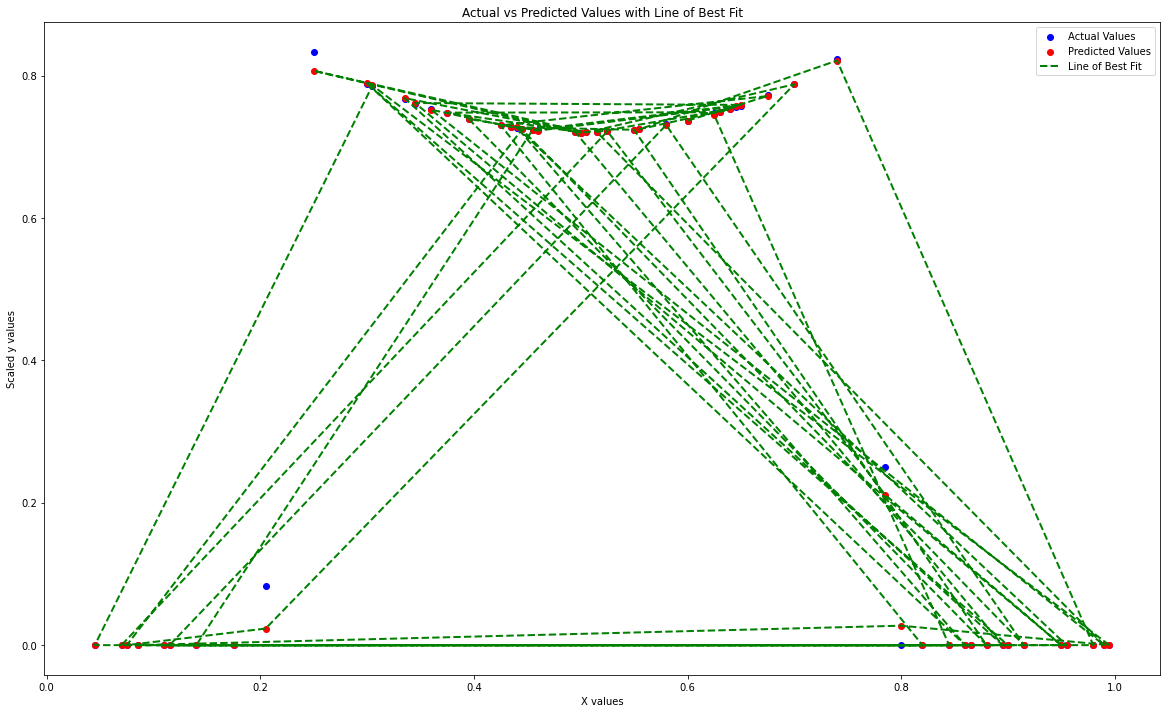

In [100]:
plt.figure(figsize=(20, 12))

# Scatter plot for predicted vs actual values
plt.scatter(X_test, y_test, color='blue', label='Actual Values')
plt.scatter(X_test, y_pred, color='red', label='Predicted Values')

# Line plot to connect predicted and actual values
plt.plot(X_test, y_pred, color='green', linestyle='dashed', linewidth=2, label='Line of Best Fit')

# Adding labels and title
plt.xlabel('X values')
plt.ylabel('Scaled y values')
plt.title('Actual vs Predicted Values with Line of Best Fit')

# Adding legend
plt.legend()

# Show the plot
plt.show()

### Predict edilen değer kısmı:

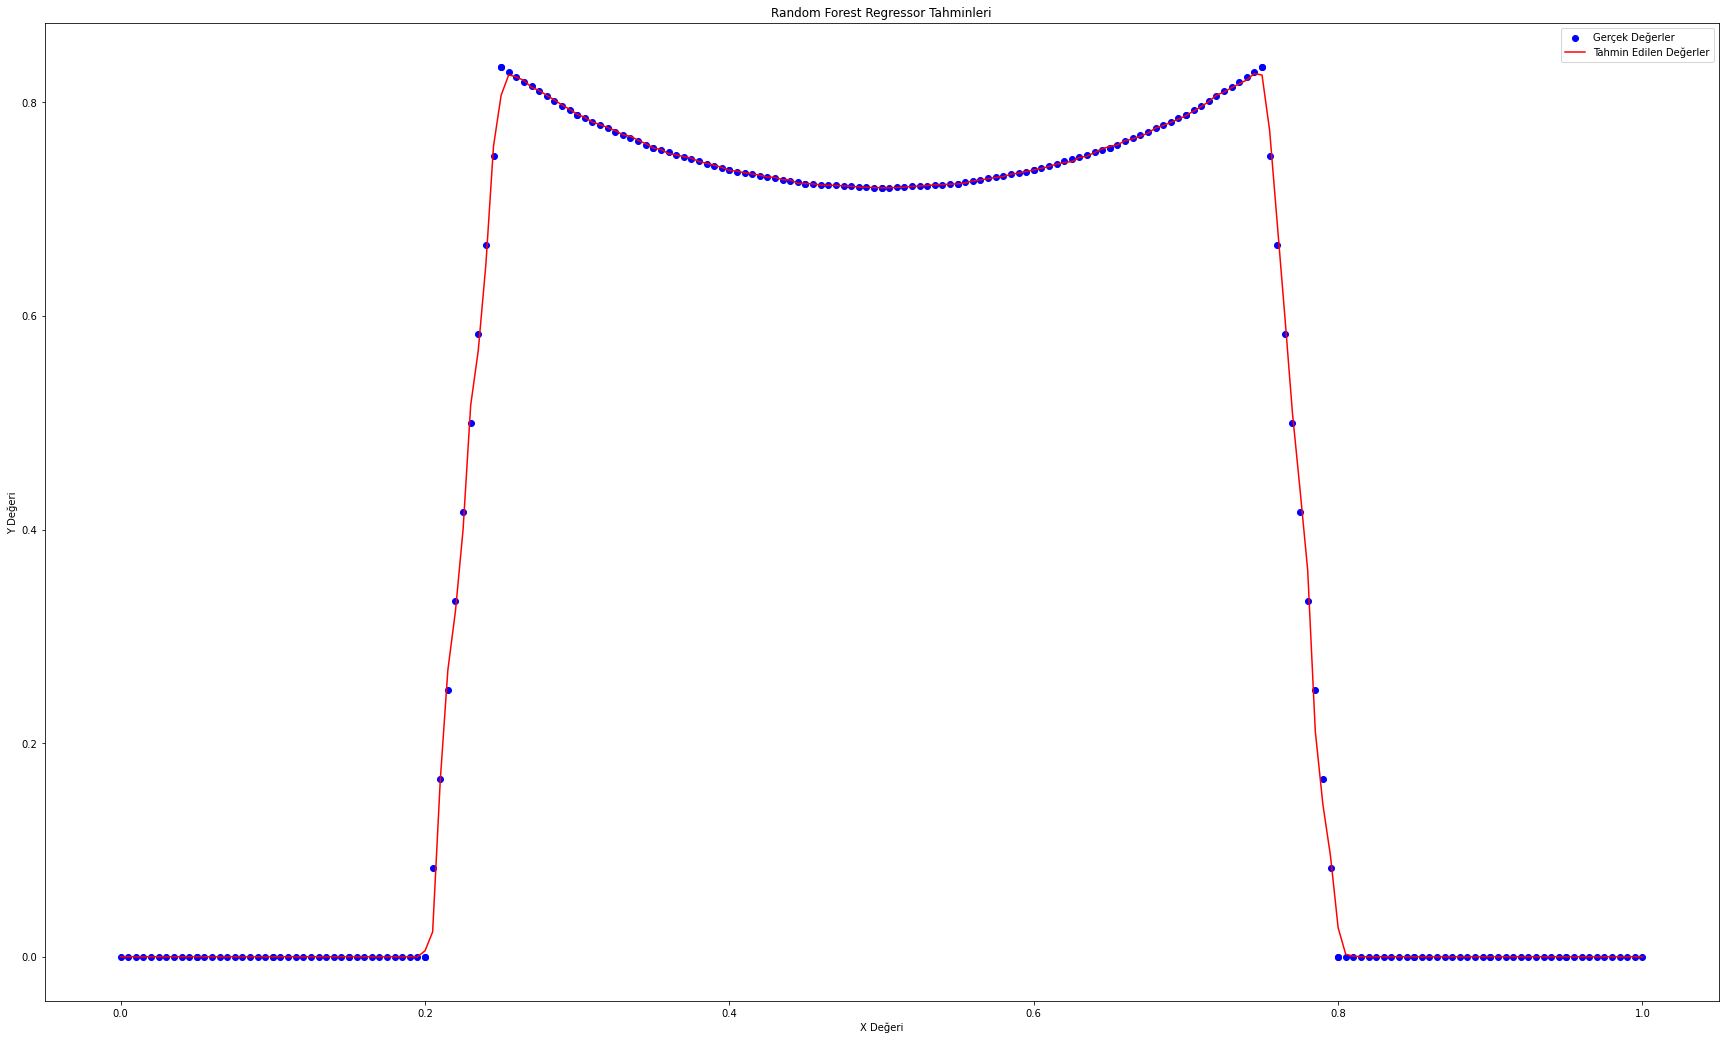

In [101]:
# 0'dan 1'e kadar olan değerleri içeren bir dizi oluştur
X_values = np.arange(0, 1.005, 0.005).reshape(-1, 1)

# Modelin tahmin ettiği değerleri al
y_pred_values = rf_reg.predict(X_values)

# Gerçek değerler için aynı işlemi yap
y_true_values = rf_reg.predict(X)

plt.figure(figsize=(30, 18))
plt.scatter(X, y, color='blue', label='Gerçek Değerler')
plt.plot(X_values, y_pred_values, color='red', label='Tahmin Edilen Değerler')
plt.xlabel('X Değeri')
plt.ylabel('Y Değeri')
plt.title('Random Forest Regressor Tahminleri')
plt.legend()
plt.show()

#### manuel tek bir değerin predict edilebileceği kısım:

In [102]:
print(rf_reg.predict([[0.285]])) #0.285 ==	8.015022e-01 gerçek değerde

[0.8]


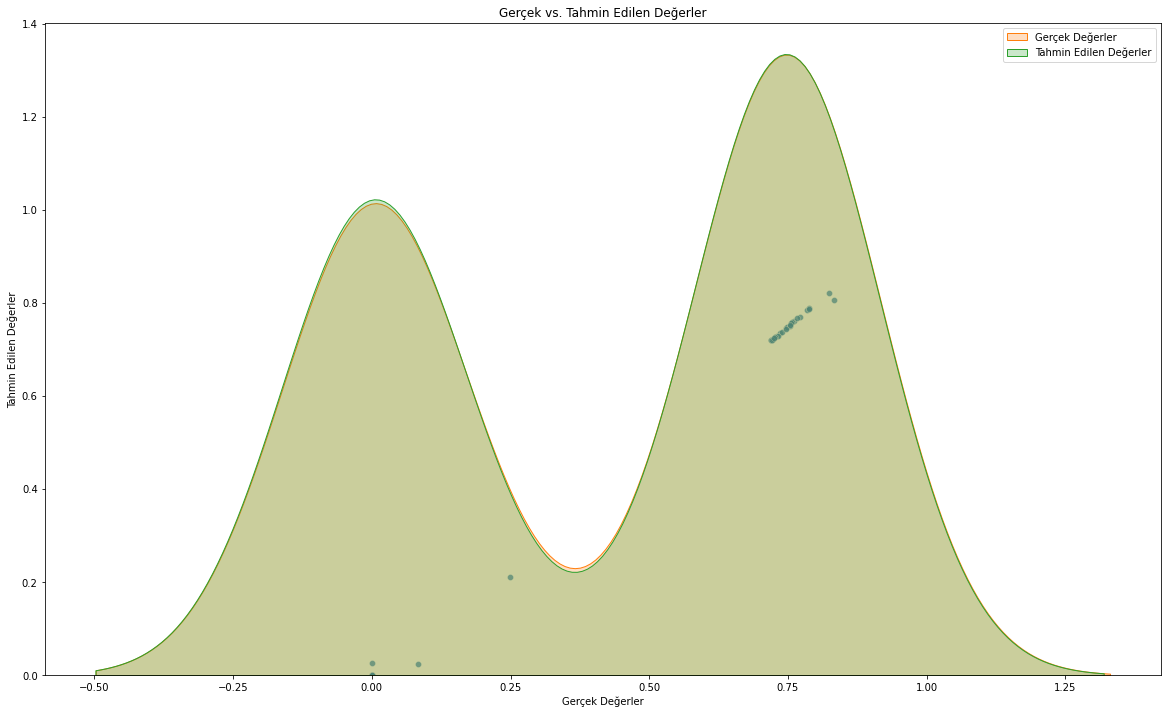

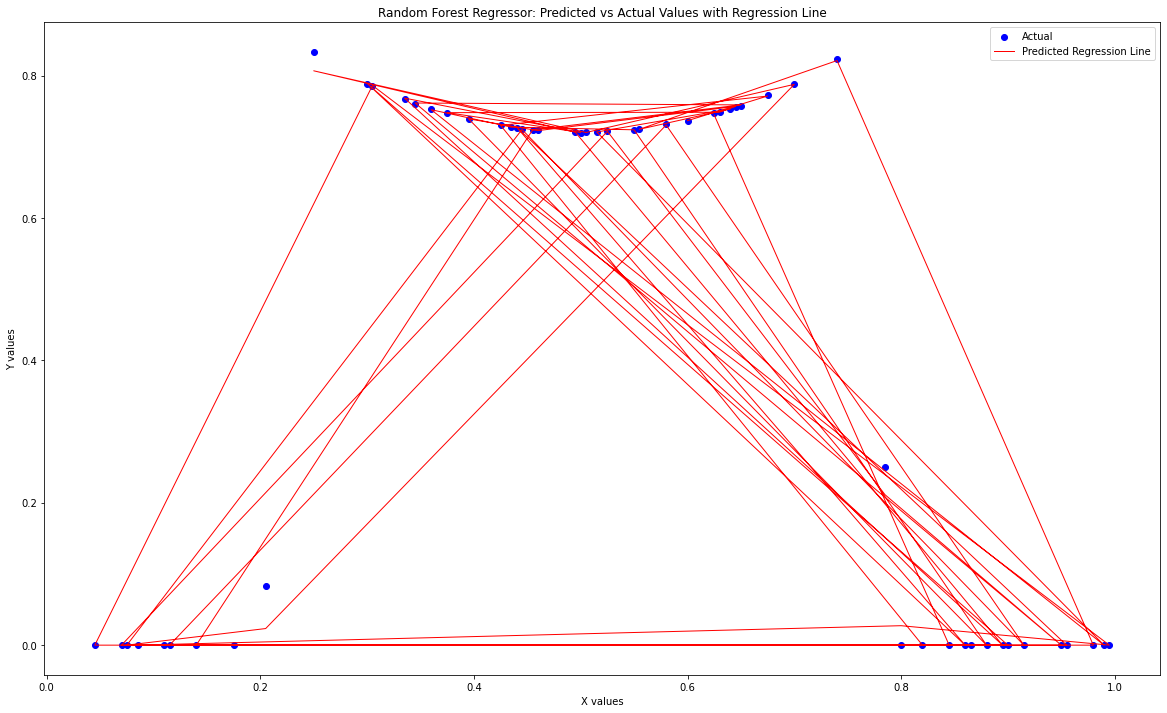

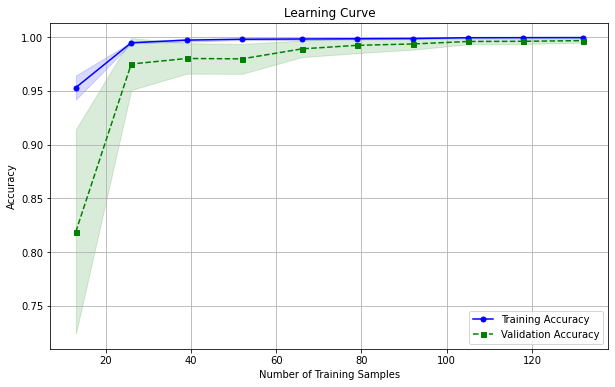

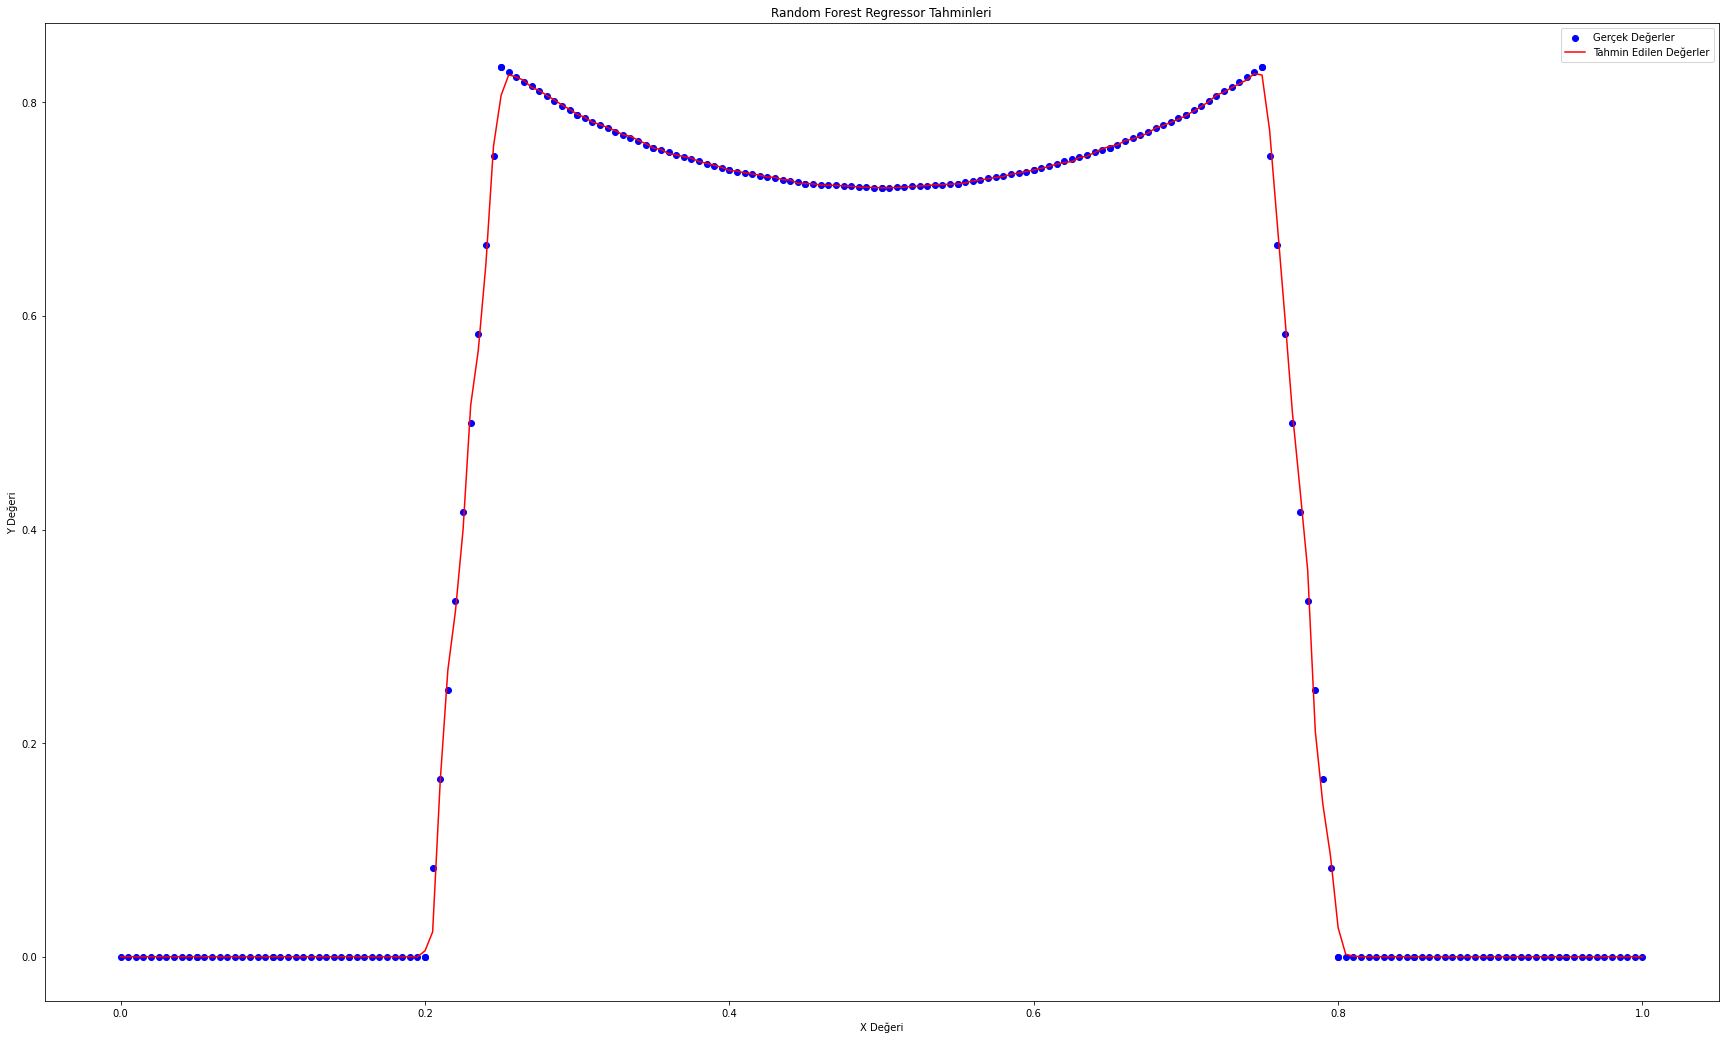

[0.8]


In [107]:
# Gerçek ve tahmin edilen değerleri içeren DataFrame
result_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})

# Scatter plot çizimi
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Gerçek Değerler'], label='Gerçek Değerler', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', shade=True)

plt.legend()
plt.show() 


df_results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

plt.figure(figsize=(20, 12))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicted Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Random Forest Regressor: Predicted vs Actual Values with Regression Line')
plt.legend()
plt.show()


from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=rf_reg, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.grid()
plt.show()

### Predict edilen değer kısmı:
# 0'dan 1'e kadar olan değerleri içeren bir dizi oluştur
X_values = np.arange(0, 1.005, 0.005).reshape(-1, 1)

# Modelin tahmin ettiği değerleri al
y_pred_values = rf_reg.predict(X_values)

# Gerçek değerler için aynı işlemi yap
y_true_values = rf_reg.predict(X)

plt.figure(figsize=(30, 18))
plt.scatter(X, y, color='blue', label='Gerçek Değerler')
plt.plot(X_values, y_pred_values, color='red', label='Tahmin Edilen Değerler')
plt.xlabel('X Değeri')
plt.ylabel('Y Değeri')
plt.title('Random Forest Regressor Tahminleri')
plt.legend()
plt.show()

print(rf_reg.predict([[0.285]])) #0.285 ==	8.015022e-01 gerçek değerde

In [73]:
y_test.shape

(55, 1)

In [75]:
y_train.shape

(165, 1)

In [76]:
data.value_counts()

ynz2_14_fi_x1_izort (koordinat)  ynz2_14_fi_x1_imort
0.000                             0.000000e+00          1
0.690                             7.818413e-01          1
0.640                             7.530796e-01          1
0.645                             7.551657e-01          1
0.650                             7.572519e-01          1
                                  7.572519e-01          1
0.655                             7.603255e-01          1
0.660                             7.633992e-01          1
0.665                             7.664729e-01          1
0.670                             7.695466e-01          1
0.675                             7.726203e-01          1
0.680                             7.756939e-01          1
0.685                             7.787676e-01          1
0.695                             7.849150e-01          1
0.630                             7.489074e-01          1
0.700                             7.879886e-01          1
                   

In [78]:
y.shape

(220, 1)

### XGBRegressor ile deneyelim

[[ 7.36e-01  7.36e-01]
 [ 7.75e-01  7.73e-01]
 [ 7.29e-01  7.30e-01]
 [ 8.16e-04  0.00e+00]
 [ 7.83e-04  0.00e+00]
 [ 7.22e-01  7.22e-01]
 [ 1.67e-01  2.50e-01]
 [ 8.16e-04  0.00e+00]
 [ 7.57e-01  7.60e-01]
 [ 7.57e-01  7.57e-01]
 [ 7.24e-01  7.23e-01]
 [ 7.83e-04  0.00e+00]
 [ 8.16e-04  0.00e+00]
 [ 7.83e-04  0.00e+00]
 [ 7.81e-01  7.85e-01]
 [ 8.16e-04  0.00e+00]
 [ 8.16e-04 -1.24e-08]
 [ 7.83e-04  0.00e+00]
 [ 8.16e-04  0.00e+00]
 [ 7.87e-01  7.88e-01]
 [ 8.16e-04  0.00e+00]
 [ 7.24e-01  7.26e-01]
 [ 8.16e-04  0.00e+00]
 [ 7.83e-04  0.00e+00]
 [ 7.32e-01  7.31e-01]
 [ 8.16e-04  0.00e+00]
 [ 7.24e-01  7.25e-01]
 [ 7.83e-04  0.00e+00]
 [ 1.67e-01  8.33e-02]
 [ 7.87e-01  7.88e-01]
 [ 7.21e-01  7.20e-01]
 [ 8.27e-01  8.33e-01]
 [ 7.21e-01  7.20e-01]
 [ 8.16e-04  0.00e+00]
 [ 7.63e-01  7.67e-01]
 [ 7.21e-01  7.20e-01]
 [ 7.44e-01  7.47e-01]
 [ 7.51e-01  7.49e-01]
 [ 7.57e-01  7.55e-01]
 [ 7.22e-01  7.23e-01]
 [ 7.36e-01  7.39e-01]
 [ 8.16e-04  0.00e+00]
 [ 7.24e-01  7.24e-01]
 [ 7.29e-01

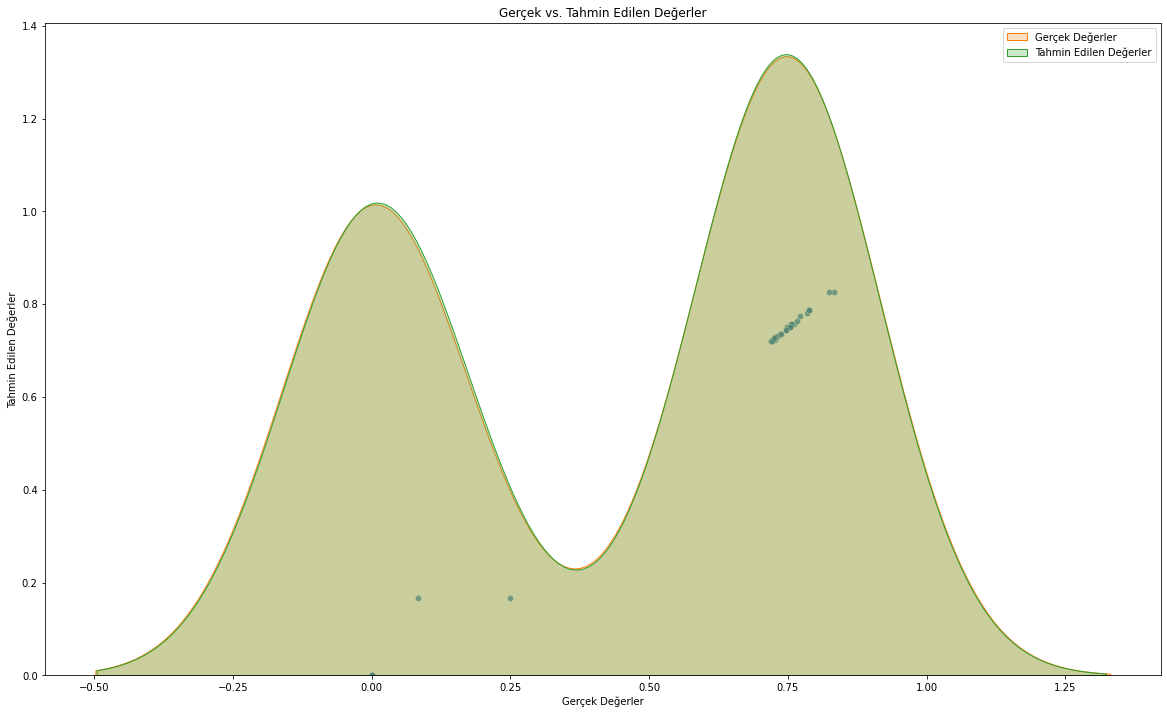

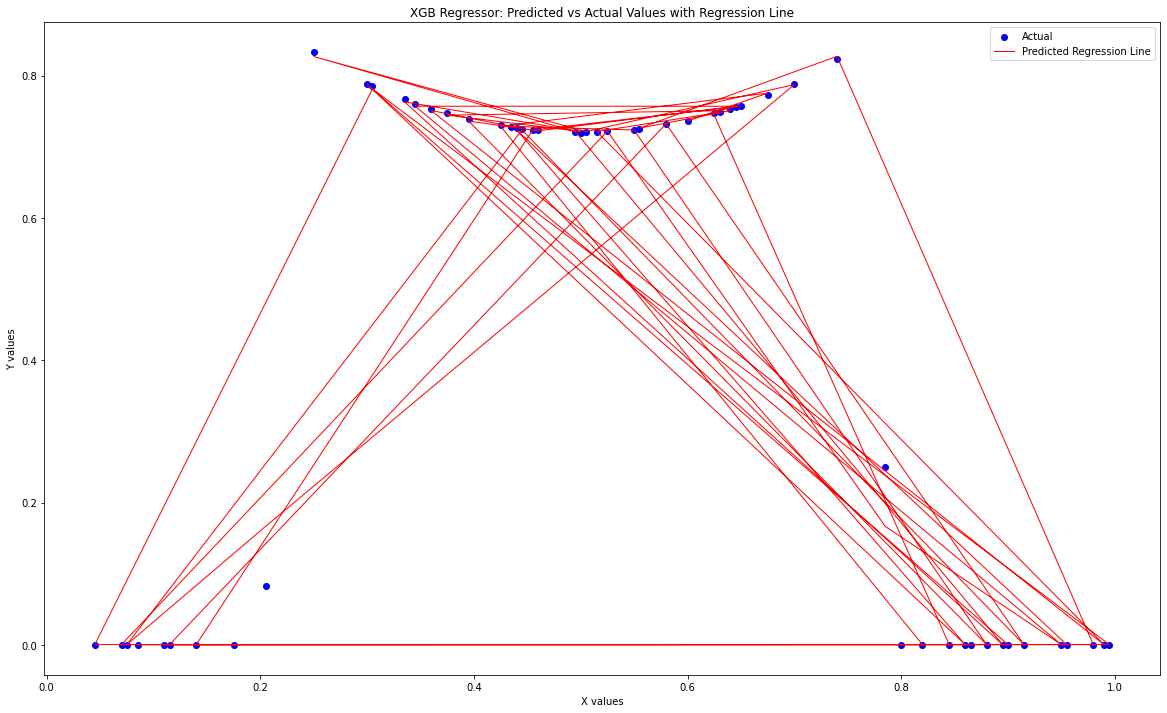

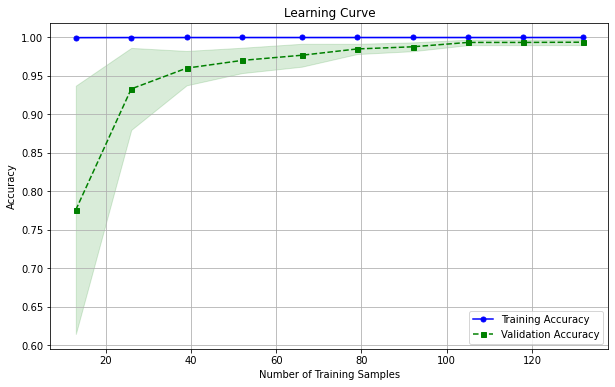

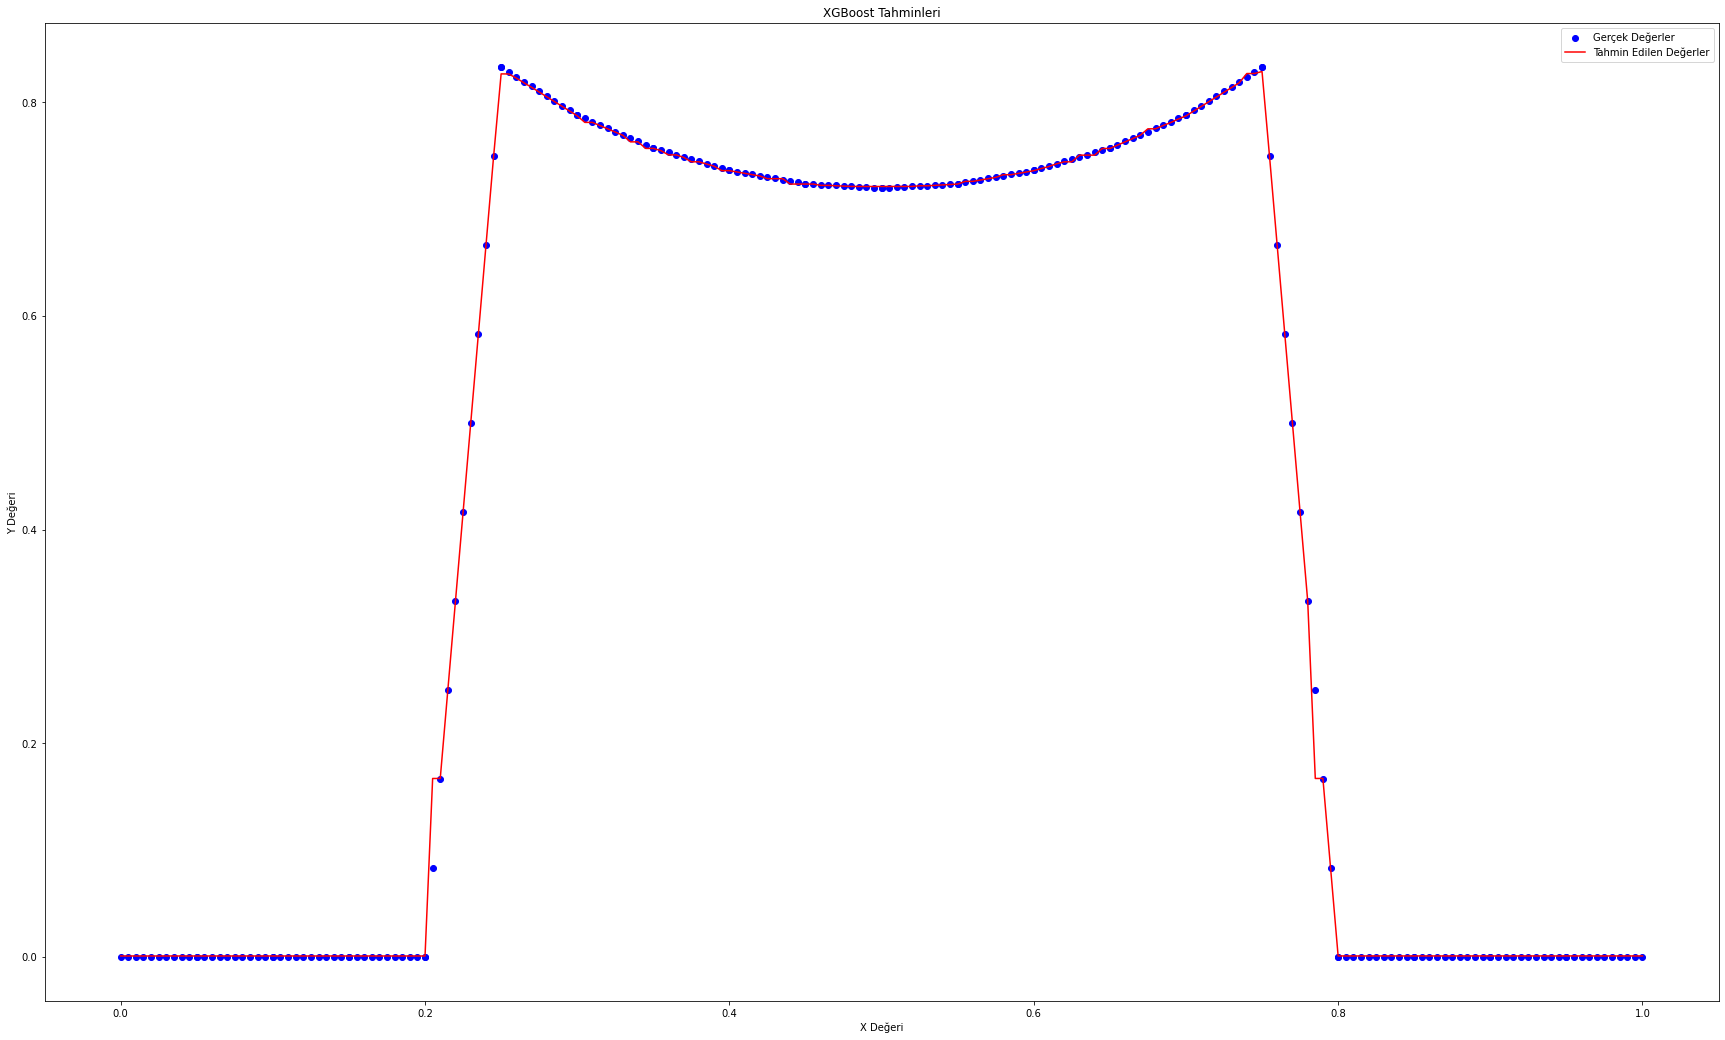

[0.8]


In [109]:
from xgboost import XGBRegressor


xgb = XGBRegressor(n_estimators=220,
                    learning_rate = 0.03,
                    max_depth = 7,
                    random_state=42,
                    n_jobs = -1,
                    reg_lambda=0.995,
                    )

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


print(r2_score(y_test, y_pred))

# Use test and show results of test set
y_hat = xgb.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
mape = np.mean(np.abs((y - y_hat) / y)) * 100

print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("MAPE:               ", mape)
print ("r2:                 ", xgb.score(X,y))


# Gerçek ve tahmin edilen değerleri içeren DataFrame
result_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})

# Scatter plot çizimi
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Gerçek Değerler'], label='Gerçek Değerler', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', shade=True)

plt.legend()
plt.show() 


df_results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

plt.figure(figsize=(20, 12))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicted Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('XGB Regressor: Predicted vs Actual Values with Regression Line')
plt.legend()
plt.show()


from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=xgb, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.grid()
plt.show()


#XGBoost Predict değer grafiği
# 0'dan 1'e kadar olan değerleri içeren bir dizi oluştur
X_values = np.arange(0, 1.005, 0.005).reshape(-1, 1)

# Modelin tahmin ettiği değerleri al
y_pred_values = xgb.predict(X_values)

# Gerçek değerler için aynı işlemi yap
y_true_values = xgb.predict(X)

plt.figure(figsize=(30, 18))
plt.scatter(X, y, color='blue', label='Gerçek Değerler')
plt.plot(X_values, y_pred_values, color='red', label='Tahmin Edilen Değerler')
plt.xlabel('X Değeri')
plt.ylabel('Y Değeri')
plt.title('XGBoost Tahminleri')
plt.legend()
plt.show()


print(xgb.predict([[0.285]])) #0.285 ==	8.015022e-01 gerçek değerde

### GradientBoostingRegressor deneyelim

[[ 7.37e-01  7.36e-01]
 [ 7.67e-01  7.73e-01]
 [ 7.30e-01  7.30e-01]
 [ 1.92e-03  0.00e+00]
 [ 1.78e-03  0.00e+00]
 [ 7.29e-01  7.22e-01]
 [ 1.67e-01  2.50e-01]
 [ 1.92e-03  0.00e+00]
 [ 7.61e-01  7.60e-01]
 [ 7.55e-01  7.57e-01]
 [ 7.29e-01  7.23e-01]
 [ 1.78e-03  0.00e+00]
 [ 1.92e-03  0.00e+00]
 [ 1.78e-03  0.00e+00]
 [ 7.84e-01  7.85e-01]
 [ 1.92e-03  0.00e+00]
 [ 1.92e-03 -1.24e-08]
 [ 1.78e-03  0.00e+00]
 [ 1.92e-03  0.00e+00]
 [ 7.84e-01  7.88e-01]
 [ 1.92e-03  0.00e+00]
 [ 7.30e-01  7.26e-01]
 [ 1.92e-03  0.00e+00]
 [ 1.78e-03  0.00e+00]
 [ 7.32e-01  7.31e-01]
 [ 1.92e-03  0.00e+00]
 [ 7.29e-01  7.25e-01]
 [ 1.78e-03  0.00e+00]
 [ 1.78e-03  8.33e-02]
 [ 7.85e-01  7.88e-01]
 [ 7.29e-01  7.20e-01]
 [ 8.13e-01  8.33e-01]
 [ 7.29e-01  7.20e-01]
 [ 1.92e-03  0.00e+00]
 [ 7.67e-01  7.67e-01]
 [ 7.29e-01  7.20e-01]
 [ 7.47e-01  7.47e-01]
 [ 7.49e-01  7.49e-01]
 [ 7.55e-01  7.55e-01]
 [ 7.29e-01  7.23e-01]
 [ 7.39e-01  7.39e-01]
 [ 1.92e-03  0.00e+00]
 [ 7.29e-01  7.24e-01]
 [ 7.30e-01

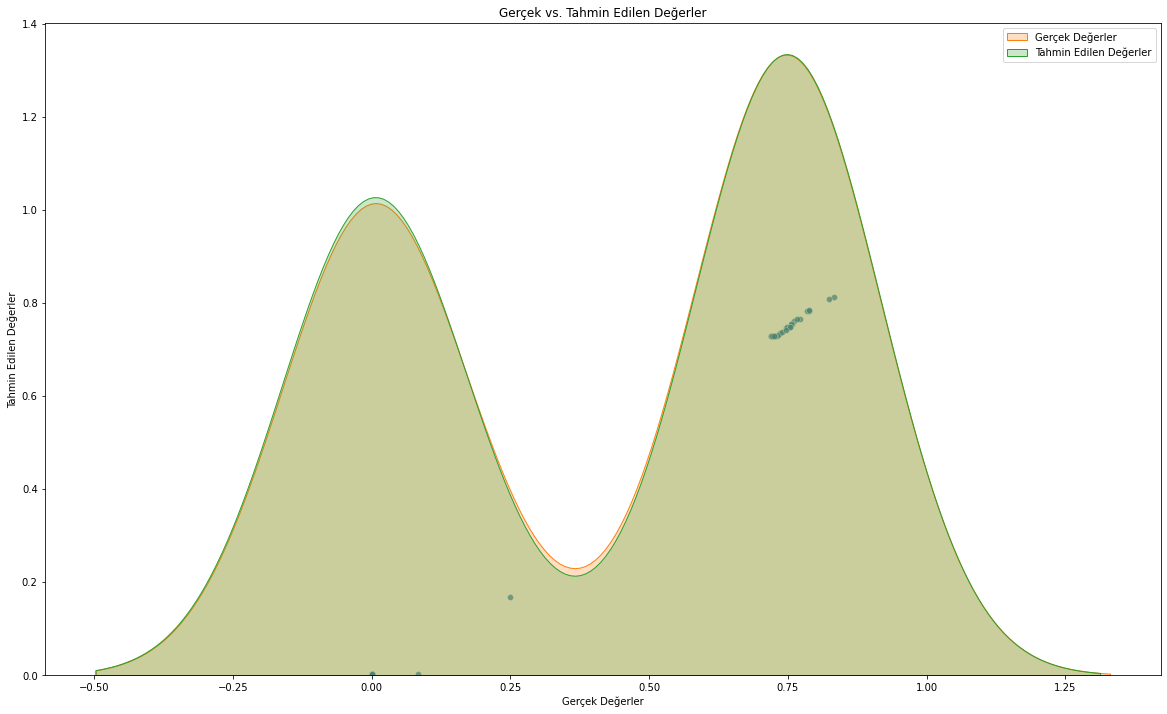

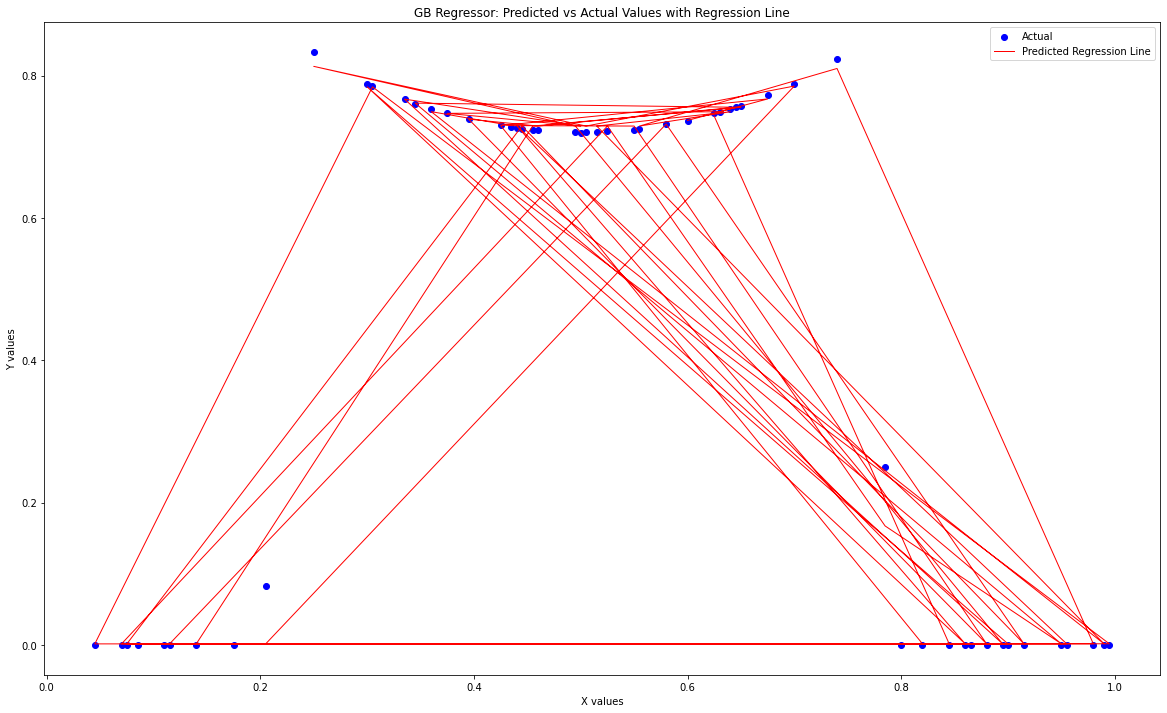

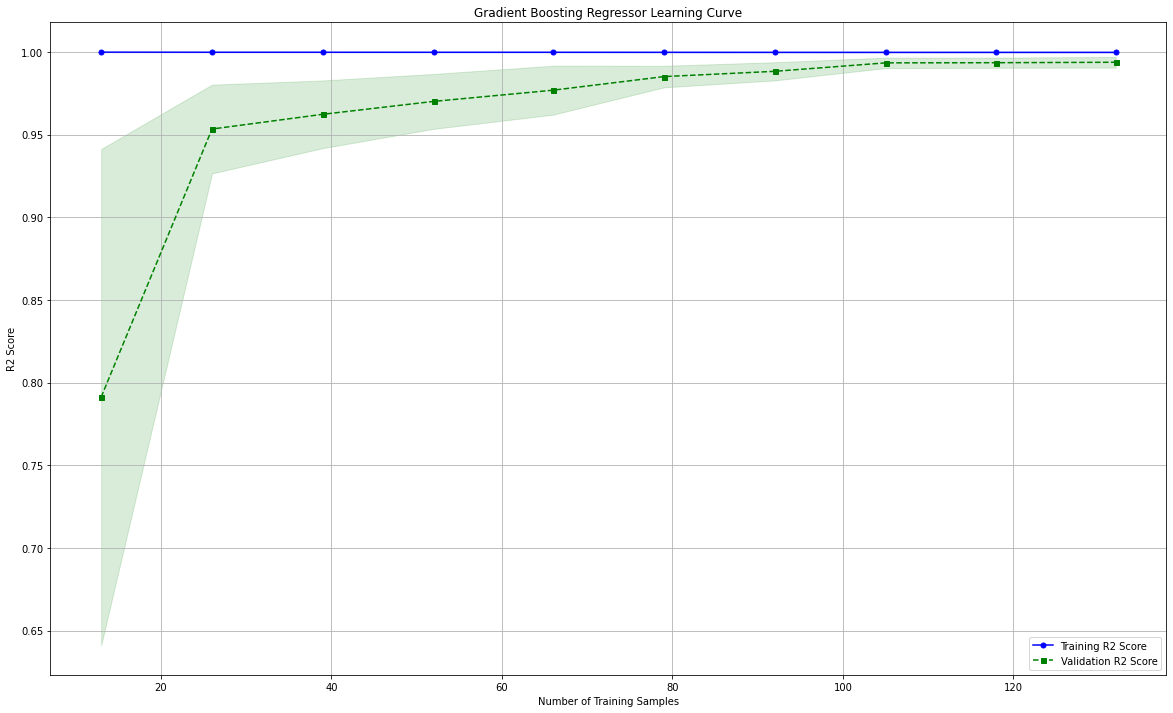

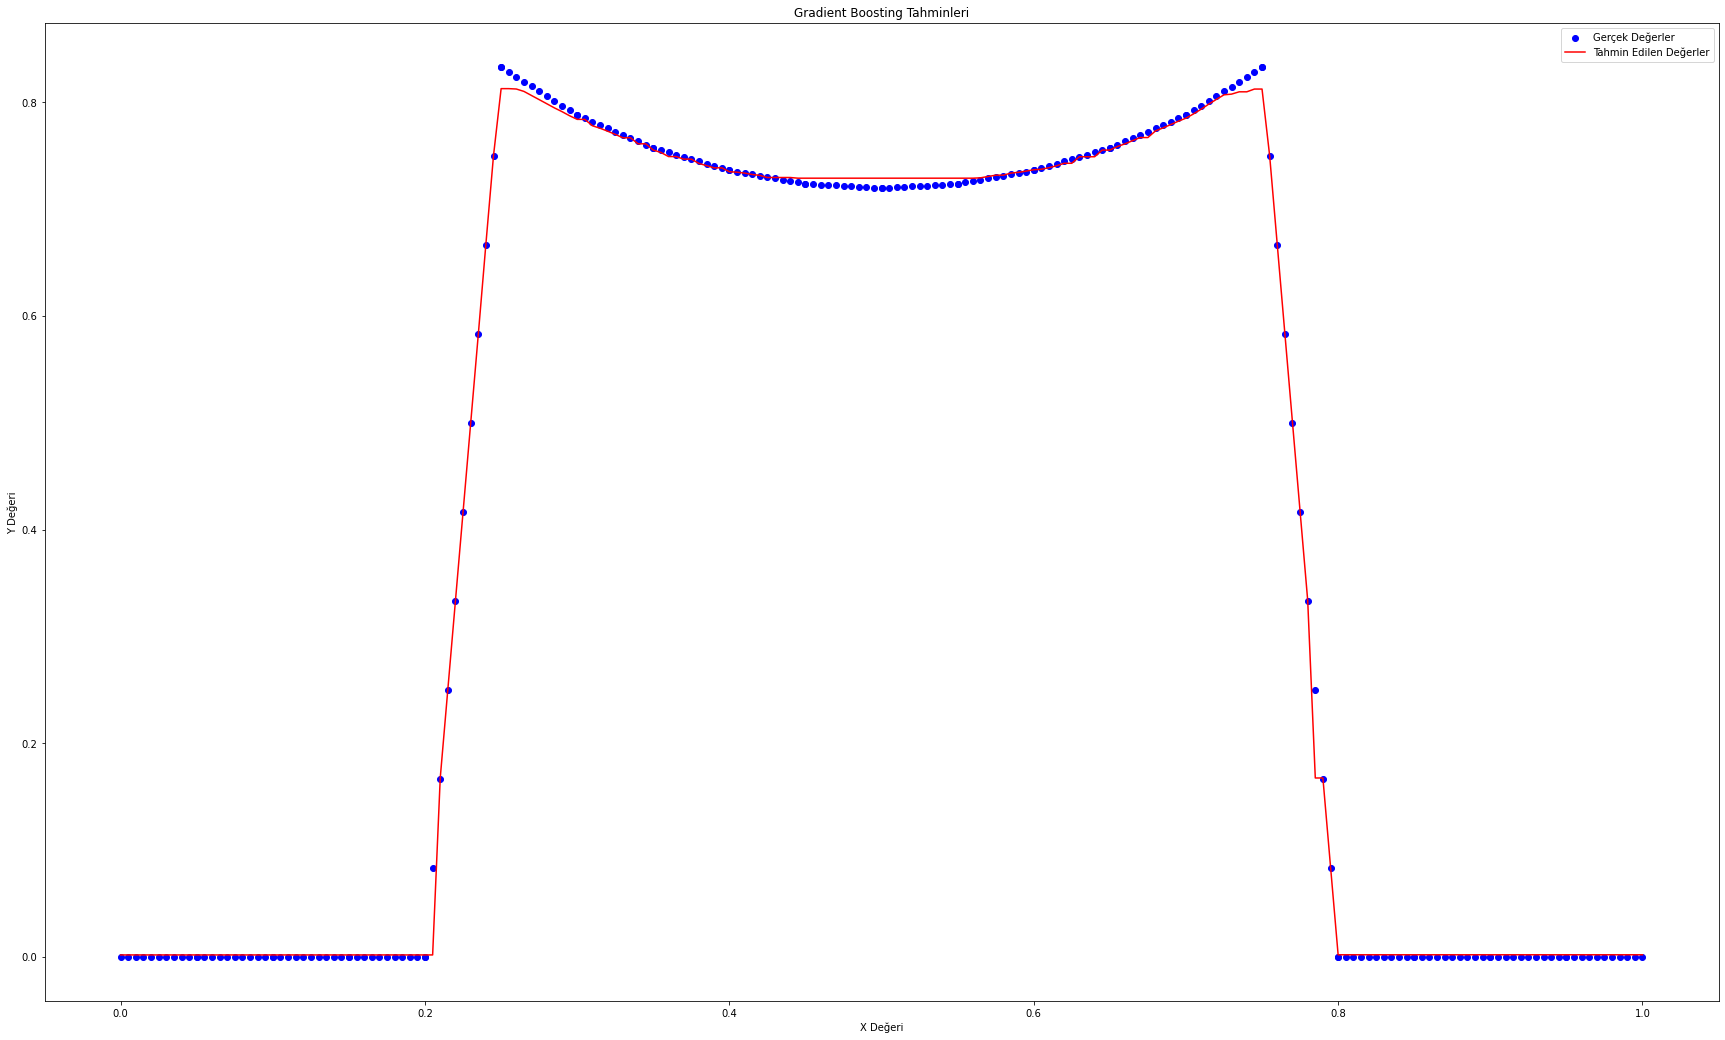

[0.79]


In [110]:
gb_reg = GradientBoostingRegressor(random_state=42,n_estimators=220,criterion='squared_error', learning_rate = 0.03)

gb_reg.fit(X_train, y_train)

y_pred = gb_reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


print(r2_score(y_test, y_pred))

# Use test and show results of test set
y_hat = gb_reg.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
mape = np.mean(np.abs((y - y_hat) / y)) * 100

print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("MAPE:               ", mape)
print ("r2:                 ", gb_reg.score(X,y))


# Gerçek ve tahmin edilen değerleri içeren DataFrame
result_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})

# Scatter plot çizimi
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Gerçek Değerler'], label='Gerçek Değerler', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', shade=True)

plt.legend()
plt.show() 


df_results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

plt.figure(figsize=(20, 12))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicted Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('GB Regressor: Predicted vs Actual Values with Regression Line')
plt.legend()
plt.show()


train_sizes, train_scores, test_scores = learning_curve(estimator=gb_reg, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(20, 12))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training R2 Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation R2 Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('R2 Score')
plt.legend(loc='lower right')
plt.title('Gradient Boosting Regressor Learning Curve')
plt.grid()
plt.show()


# Gradient Boosting Predict
# 0'dan 1'e kadar olan değerleri içeren bir dizi oluştur
X_values = np.arange(0, 1.005, 0.005).reshape(-1, 1)

# Modelin tahmin ettiği değerleri al
y_pred_values = gb_reg.predict(X_values)

# Gerçek değerler için aynı işlemi yap
y_true_values = gb_reg.predict(X)

plt.figure(figsize=(30, 18))
plt.scatter(X, y, color='blue', label='Gerçek Değerler')
plt.plot(X_values, y_pred_values, color='red', label='Tahmin Edilen Değerler')
plt.xlabel('X Değeri')
plt.ylabel('Y Değeri')
plt.title('Gradient Boosting Tahminleri')
plt.legend()
plt.show()


print(gb_reg.predict([[0.285]])) #0.285 ==	8.015022e-01 gerçek değerde

### SupportVectorRegressor deneyelim

[[ 7.87e-01  7.36e-01]
 [ 7.60e-01  7.73e-01]
 [ 7.75e-01  7.30e-01]
 [ 2.40e-01  0.00e+00]
 [-5.96e-02  0.00e+00]
 [ 7.45e-01  7.22e-01]
 [ 3.98e-01  2.50e-01]
 [-4.90e-02  0.00e+00]
 [ 7.77e-01  7.60e-01]
 [ 7.87e-01  7.57e-01]
 [ 7.56e-01  7.23e-01]
 [ 5.65e-02  0.00e+00]
 [ 6.60e-02  0.00e+00]
 [-4.42e-02  0.00e+00]
 [ 7.09e-01  7.85e-01]
 [ 2.13e-02  0.00e+00]
 [ 3.30e-01 -1.24e-08]
 [-5.44e-02  0.00e+00]
 [-2.14e-02  0.00e+00]
 [ 6.96e-01  7.88e-01]
 [ 8.24e-02  0.00e+00]
 [ 7.65e-01  7.26e-01]
 [-4.53e-02  0.00e+00]
 [-1.10e-02  0.00e+00]
 [ 7.76e-01  7.31e-01]
 [-4.22e-02  0.00e+00]
 [ 7.62e-01  7.25e-01]
 [-5.91e-02  0.00e+00]
 [ 3.22e-01  8.33e-02]
 [ 7.11e-01  7.88e-01]
 [ 7.42e-01  7.20e-01]
 [ 5.23e-01  8.33e-01]
 [ 7.42e-01  7.20e-01]
 [-1.22e-02  0.00e+00]
 [ 7.65e-01  7.67e-01]
 [ 7.42e-01  7.20e-01]
 [ 7.93e-01  7.47e-01]
 [ 7.94e-01  7.49e-01]
 [ 7.90e-01  7.55e-01]
 [ 7.54e-01  7.23e-01]
 [ 7.90e-01  7.39e-01]
 [ 2.22e-02  0.00e+00]
 [ 7.57e-01  7.24e-01]
 [ 7.69e-01

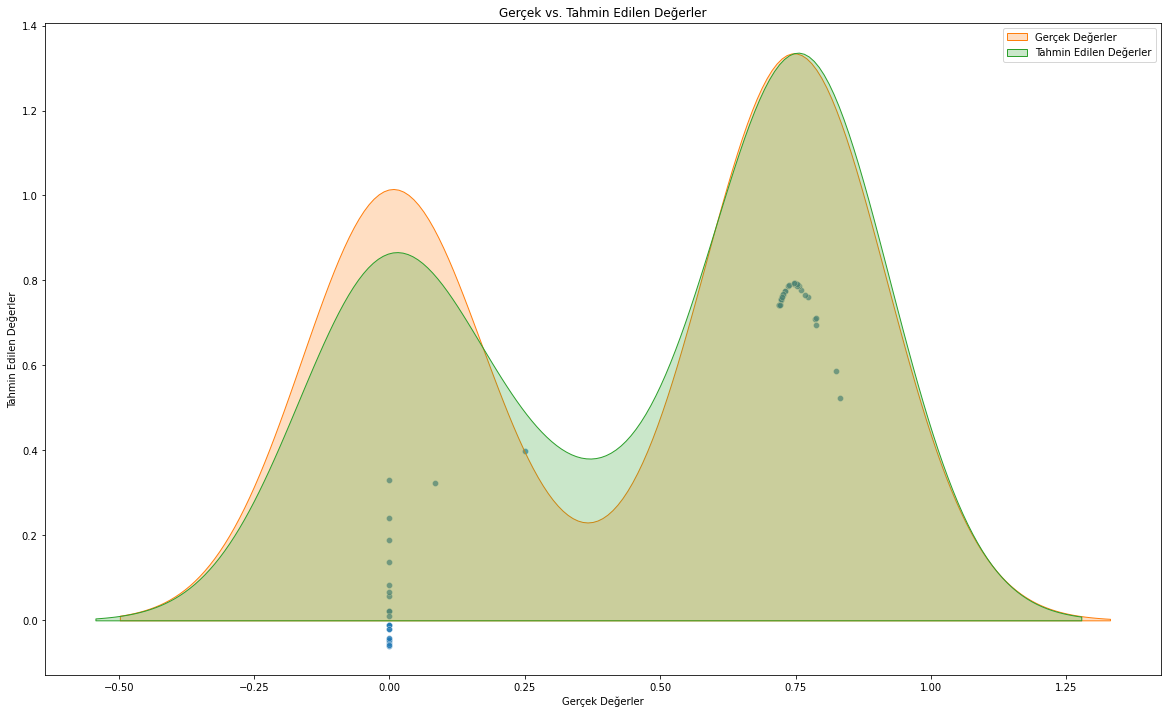

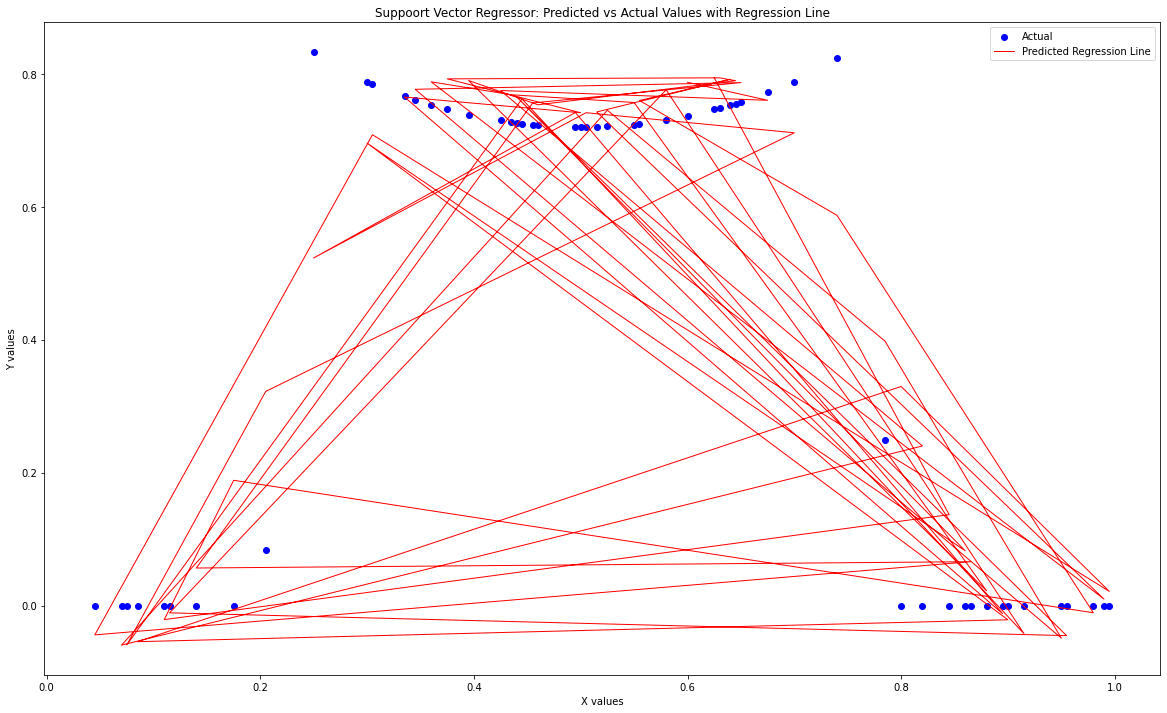

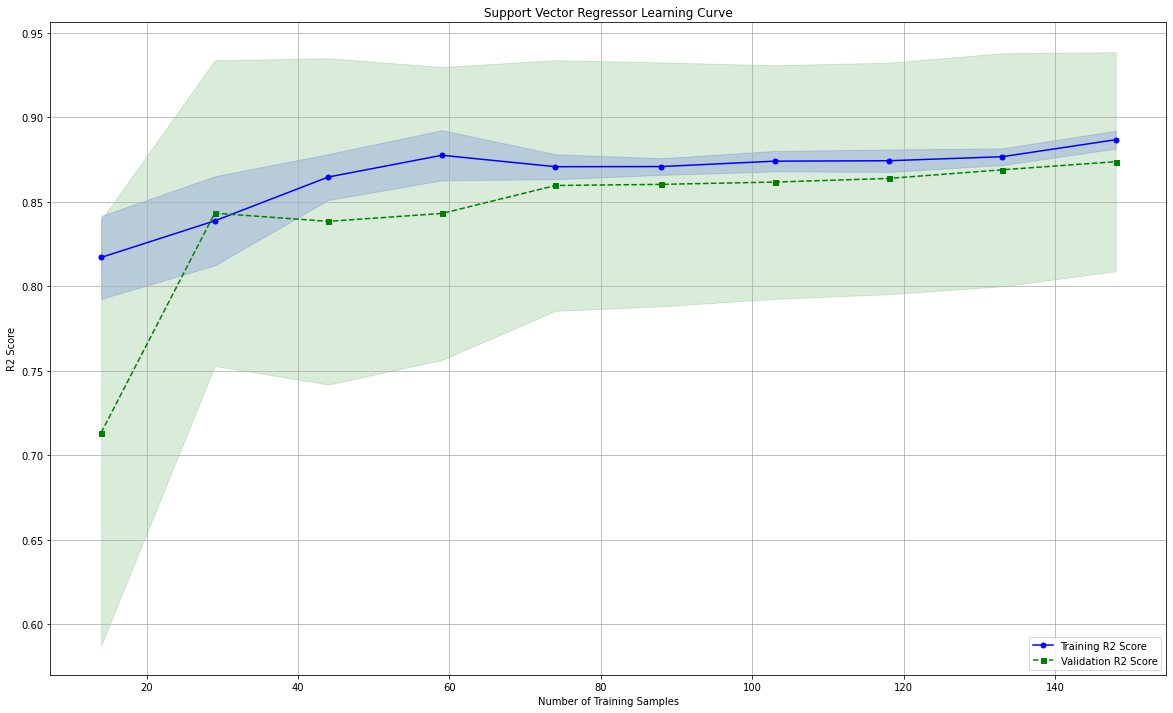

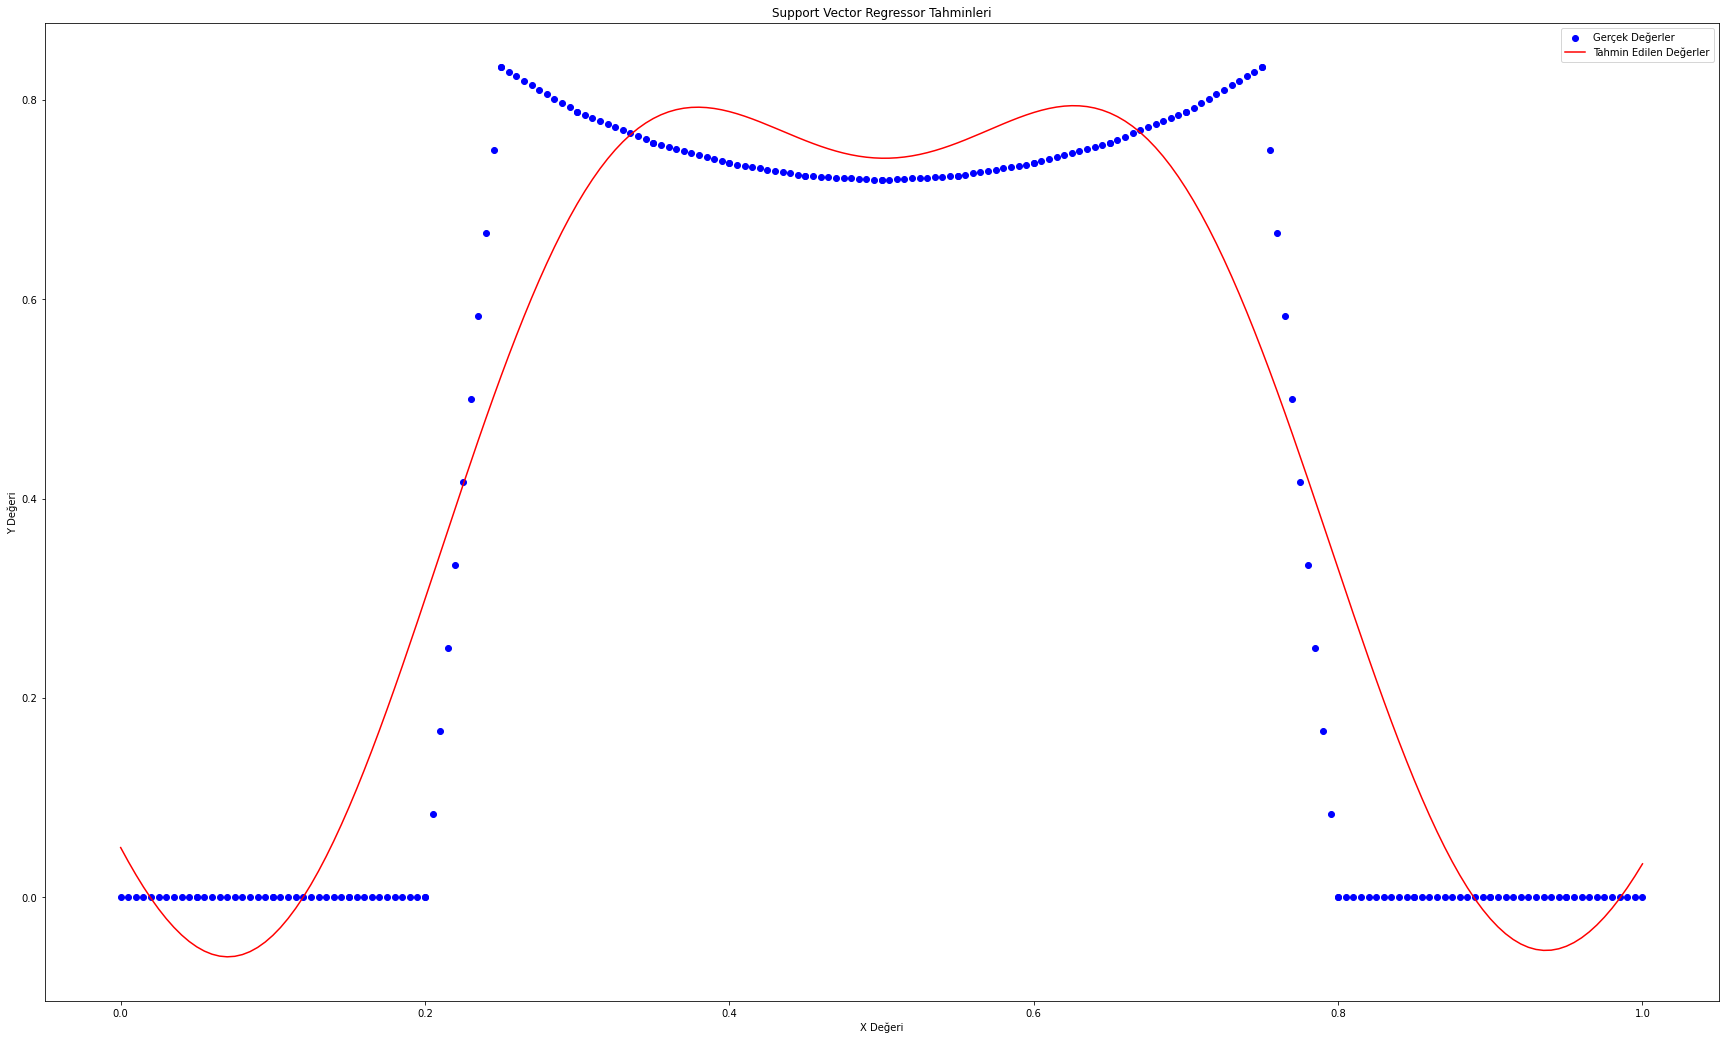

[0.65]


In [111]:
svr_reg = SVR(kernel = 'rbf', degree= 24, epsilon = 0.05)


svr_reg.fit(X_train, y_train)

y_pred = svr_reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))


print(r2_score(y_test, y_pred))


# Use test and show results of test set
y_hat = svr_reg.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
mape = np.mean(np.abs((y - y_hat) / y)) * 100

print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("MAPE:               ", mape)
print ("r2:                 ", svr_reg.score(X,y))



# Gerçek ve tahmin edilen değerleri içeren DataFrame
result_df = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred})

# Scatter plot çizimi
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)
plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Gerçek Değerler'], label='Gerçek Değerler', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', shade=True)

plt.legend()
plt.show() 


df_results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

plt.figure(figsize=(20, 12))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicted Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Suppoort Vector Regressor: Predicted vs Actual Values with Regression Line')
plt.legend()
plt.show()



train_sizes, train_scores, test_scores = learning_curve(estimator=svr_reg, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, scoring='r2')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(20, 12))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training R2 Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation R2 Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('R2 Score')
plt.legend(loc='lower right')
plt.title('Support Vector Regressor Learning Curve')
plt.grid()
plt.show()

#SVM RBF kernelli modelin predict sonuçları:
# 0'dan 1'e kadar olan değerleri içeren bir dizi oluştur
X_values = np.arange(0, 1.005, 0.005).reshape(-1, 1)

# Modelin tahmin ettiği değerleri al
y_pred_values = svr_reg.predict(X_values)

# Gerçek değerler için aynı işlemi yap
y_true_values = svr_reg.predict(X)

plt.figure(figsize=(30, 18))
plt.scatter(X, y, color='blue', label='Gerçek Değerler')
plt.plot(X_values, y_pred_values, color='red', label='Tahmin Edilen Değerler')
plt.xlabel('X Değeri')
plt.ylabel('Y Değeri')
plt.title('Support Vector Regressor Tahminleri')
plt.legend()
plt.show()

print(svr_reg.predict([[0.285]])) #0.285 ==	8.015022e-01 gerçek değerde

### PolynomialRegressor ile deneyelim

R2 Score (Polynomial Regression):  0.895471058446625
MAE (Polynomial Regression):  0.0883415715817198
RMSE (Polynomial Regression):  0.11846815625075156
MAPE (Polynomial Regression):  inf


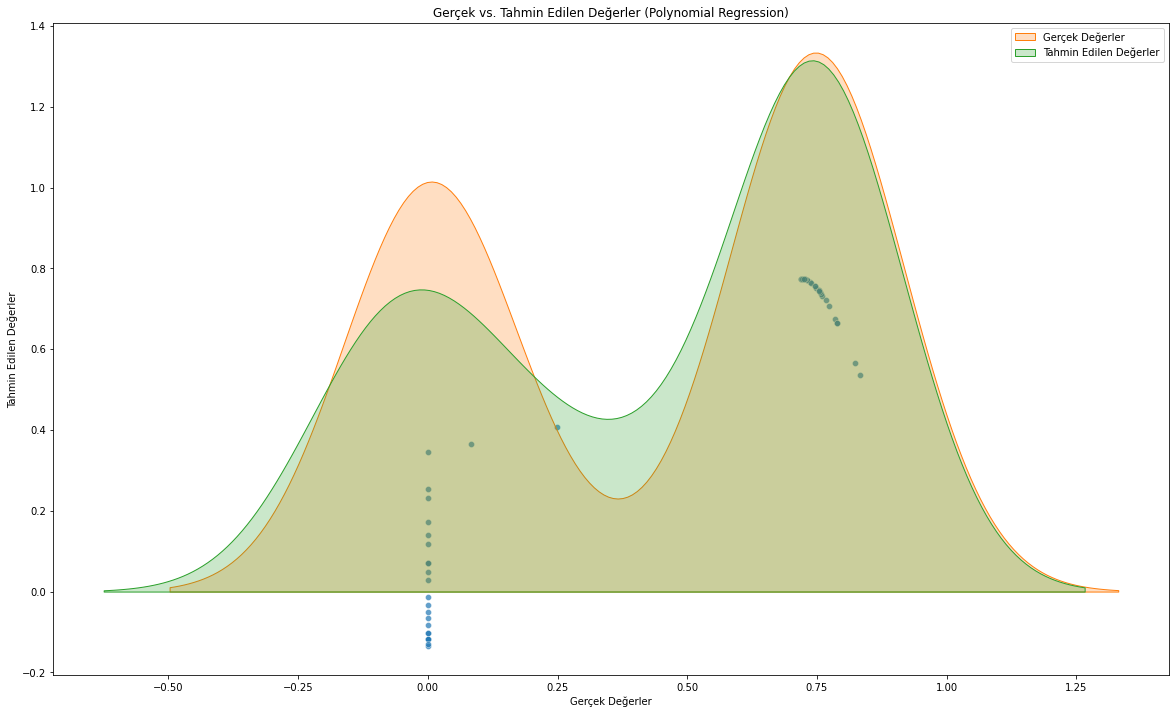

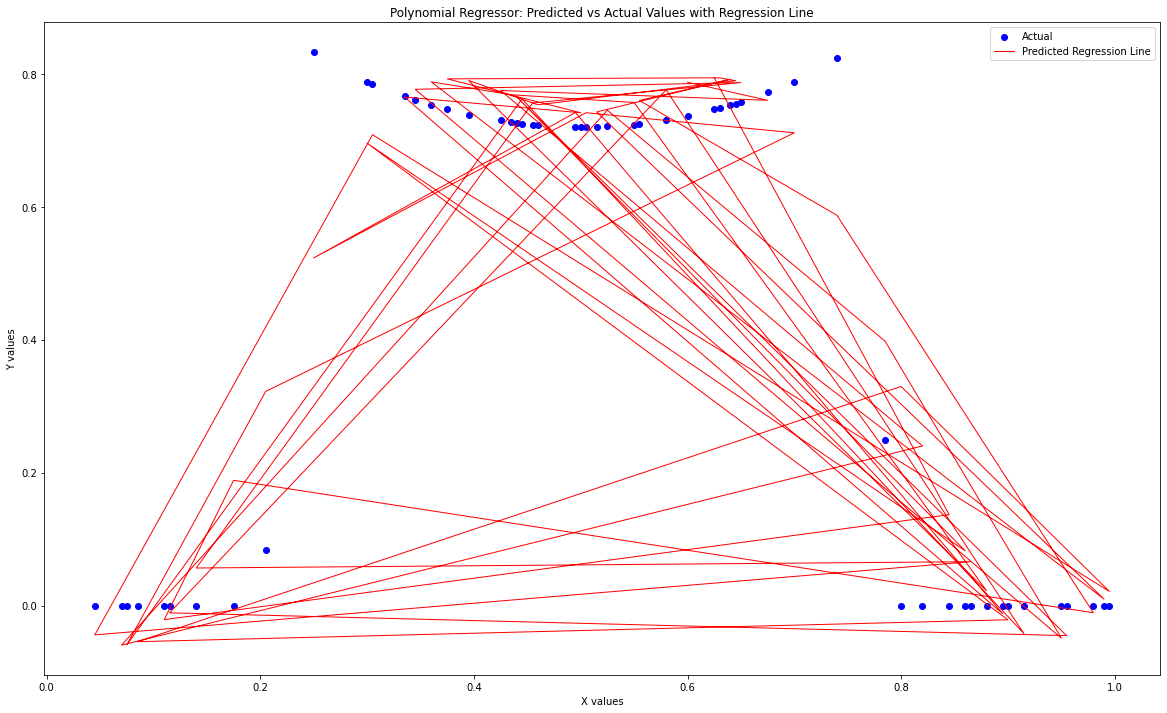

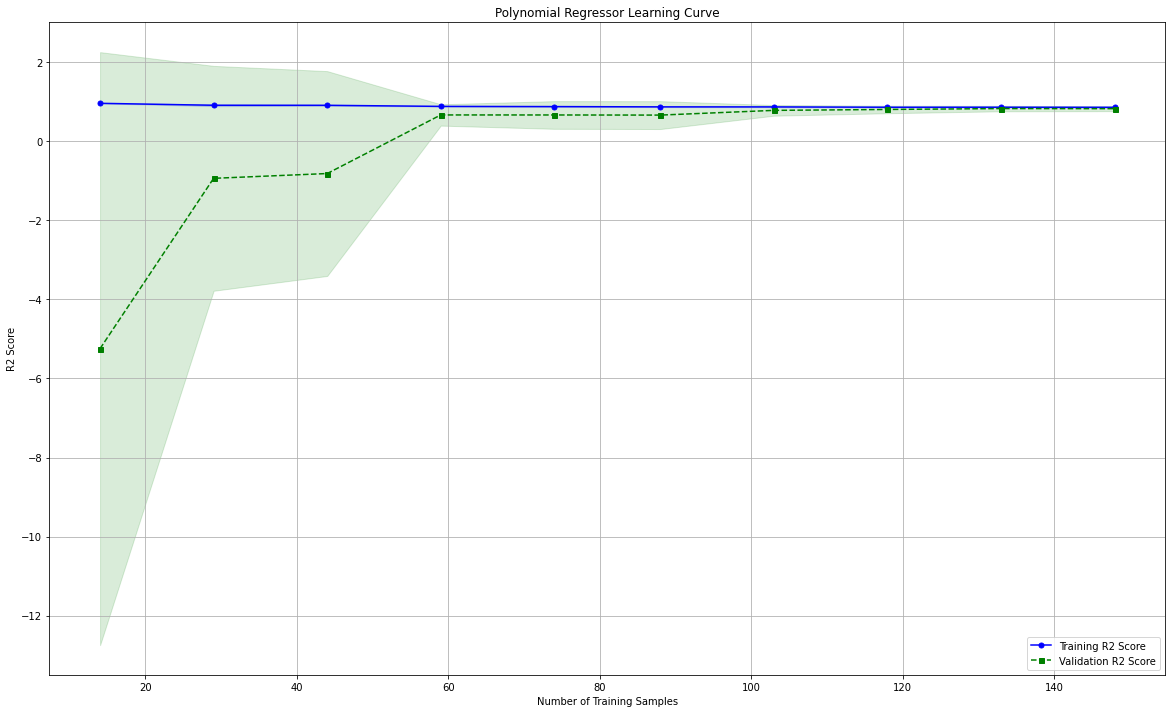

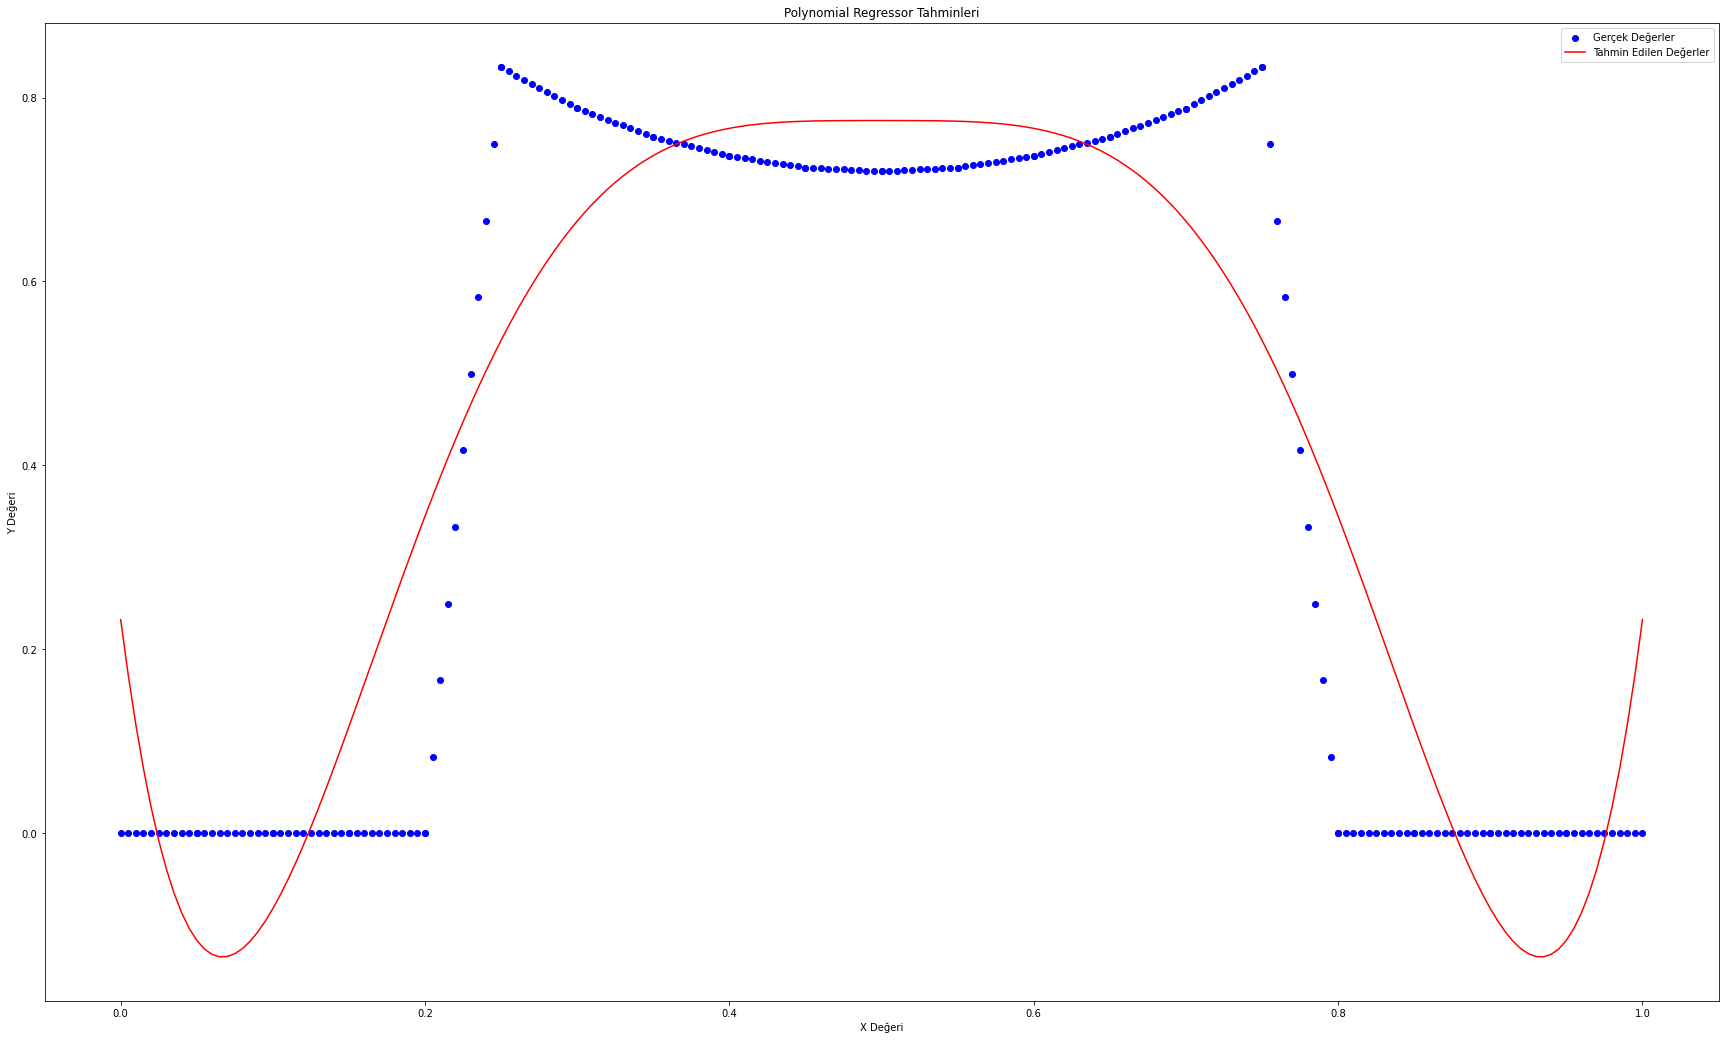

[0.63]


In [112]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# PolynomialFeatures ile özellikleri genişletme
poly = PolynomialFeatures(degree=7)
X_poly = poly.fit_transform(X)

# Lineer Regresyon modeli oluşturma
poly_reg = make_pipeline(PolynomialFeatures(7), LinearRegression())
poly_reg.fit(X, y)

# Tahminler yapma
y_pred_poly = poly_reg.predict(X_test)

# Skorları ekrana yazdırma
print("R2 Score (Polynomial Regression): ", r2_score(y_test, y_pred_poly))
print("MAE (Polynomial Regression): ", metrics.mean_absolute_error(y_test, y_pred_poly))
print("RMSE (Polynomial Regression): ", math.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))
print("MAPE (Polynomial Regression): ", np.mean(np.abs((y_test - y_pred_poly) / y_test)) * 100)

# Gerçek ve tahmin edilen değerleri içeren DataFrame
result_df_poly = pd.DataFrame({'Gerçek Değerler': y_test, 'Tahmin Edilen Değerler': y_pred_poly})

# Scatter plot çizimi
plt.figure(figsize=(20, 12))
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df_poly, palette='viridis', edgecolor='w', alpha=0.7)
plt.title('Gerçek vs. Tahmin Edilen Değerler (Polynomial Regression)')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df_poly['Gerçek Değerler'], label='Gerçek Değerler', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df_poly['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', shade=True)

plt.legend()
plt.show()


df_results = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

plt.figure(figsize=(20, 12))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=1, label='Predicted Regression Line')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('Polynomial Regressor: Predicted vs Actual Values with Regression Line')
plt.legend()
plt.show()


train_sizes, train_scores, test_scores = learning_curve(estimator=poly_reg, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=10, scoring='r2')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(20, 12))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training R2 Score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation R2 Score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('R2 Score')
plt.legend(loc='lower right')
plt.title('Polynomial Regressor Learning Curve')
plt.grid()
plt.show()


# Polynomial Regression Predict Sonuçları:
# 0'dan 1'e kadar olan değerleri içeren bir dizi oluştur
X_values = np.arange(0, 1.005, 0.005).reshape(-1, 1)

# Modelin tahmin ettiği değerleri al
y_pred_values = poly_reg.predict(X_values)

# Gerçek değerler için aynı işlemi yap
y_true_values = poly_reg.predict(X)

plt.figure(figsize=(30, 18))
plt.scatter(X, y, color='blue', label='Gerçek Değerler')
plt.plot(X_values, y_pred_values, color='red', label='Tahmin Edilen Değerler')
plt.xlabel('X Değeri')
plt.ylabel('Y Değeri')
plt.title('Polynomial Regressor Tahminleri')
plt.legend()
plt.show()


print(poly_reg.predict([[0.285]])) #0.285 ==	8.015022e-01 gerçek değerde

### Multi-Layer Perceptron

In [119]:
from keras.models import Sequential
from keras.layers import Dense

mlp = Sequential()
mlp.add(Dense(units=8, kernel_initializer='uniform', activation = 'relu', input_dim = 1))
mlp.add(Dense(units=16, kernel_initializer='uniform', activation = 'relu'))
mlp.add(Dense(units=16, kernel_initializer='uniform', activation = 'relu'))
mlp.add(Dense(units=8, kernel_initializer='uniform', activation = 'relu'))
mlp.add(Dense(units=1, kernel_initializer='uniform', activation = 'linear'))

mlp.compile(optimizer = 'adam', loss =  'mean_squared_error' , metrics = ['mae'] )
mlp.fit(X_train, y_train,epochs=100, batch_size=64, validation_split=0.1)

y_pred = mlp.predict(X_test)

Epoch 1/100
3/3 [==============================] - 1s 59ms/step - loss: 0.3030 - mae: 0.4101 - val_loss: 0.3498 - val_mae: 0.4767
Epoch 2/100
3/3 [==============================] - 0s 14ms/step - loss: 0.3003 - mae: 0.4095 - val_loss: 0.3465 - val_mae: 0.4757
Epoch 3/100
3/3 [==============================] - 0s 14ms/step - loss: 0.2974 - mae: 0.4089 - val_loss: 0.3431 - val_mae: 0.4746
Epoch 4/100
3/3 [==============================] - 0s 13ms/step - loss: 0.2945 - mae: 0.4084 - val_loss: 0.3396 - val_mae: 0.4735
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.2914 - mae: 0.4078 - val_loss: 0.3360 - val_mae: 0.4724
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 0.2883 - mae: 0.4071 - val_loss: 0.3323 - val_mae: 0.4712
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 0.2852 - mae: 0.4064 - val_loss: 0.3284 - val_mae: 0.4699
Epoch 8/100
3/3 [==============================] - 0s 13ms/step - loss: 0.2819 - mae: 0.40

3/3 [==============================] - 0s 13ms/step - loss: 0.1344 - mae: 0.3567 - val_loss: 0.1319 - val_mae: 0.3593
Epoch 64/100
3/3 [==============================] - 0s 13ms/step - loss: 0.1344 - mae: 0.3571 - val_loss: 0.1323 - val_mae: 0.3602
Epoch 65/100
3/3 [==============================] - 0s 13ms/step - loss: 0.1344 - mae: 0.3573 - val_loss: 0.1327 - val_mae: 0.3611
Epoch 66/100
3/3 [==============================] - 0s 14ms/step - loss: 0.1344 - mae: 0.3575 - val_loss: 0.1332 - val_mae: 0.3623
Epoch 67/100
3/3 [==============================] - 0s 13ms/step - loss: 0.1345 - mae: 0.3578 - val_loss: 0.1333 - val_mae: 0.3625
Epoch 68/100
3/3 [==============================] - 0s 15ms/step - loss: 0.1345 - mae: 0.3579 - val_loss: 0.1331 - val_mae: 0.3621
Epoch 69/100
3/3 [==============================] - 0s 16ms/step - loss: 0.1344 - mae: 0.3578 - val_loss: 0.1332 - val_mae: 0.3624
Epoch 70/100
3/3 [==============================] - 0s 14ms/step - loss: 0.1344 - mae: 0.3578 - 

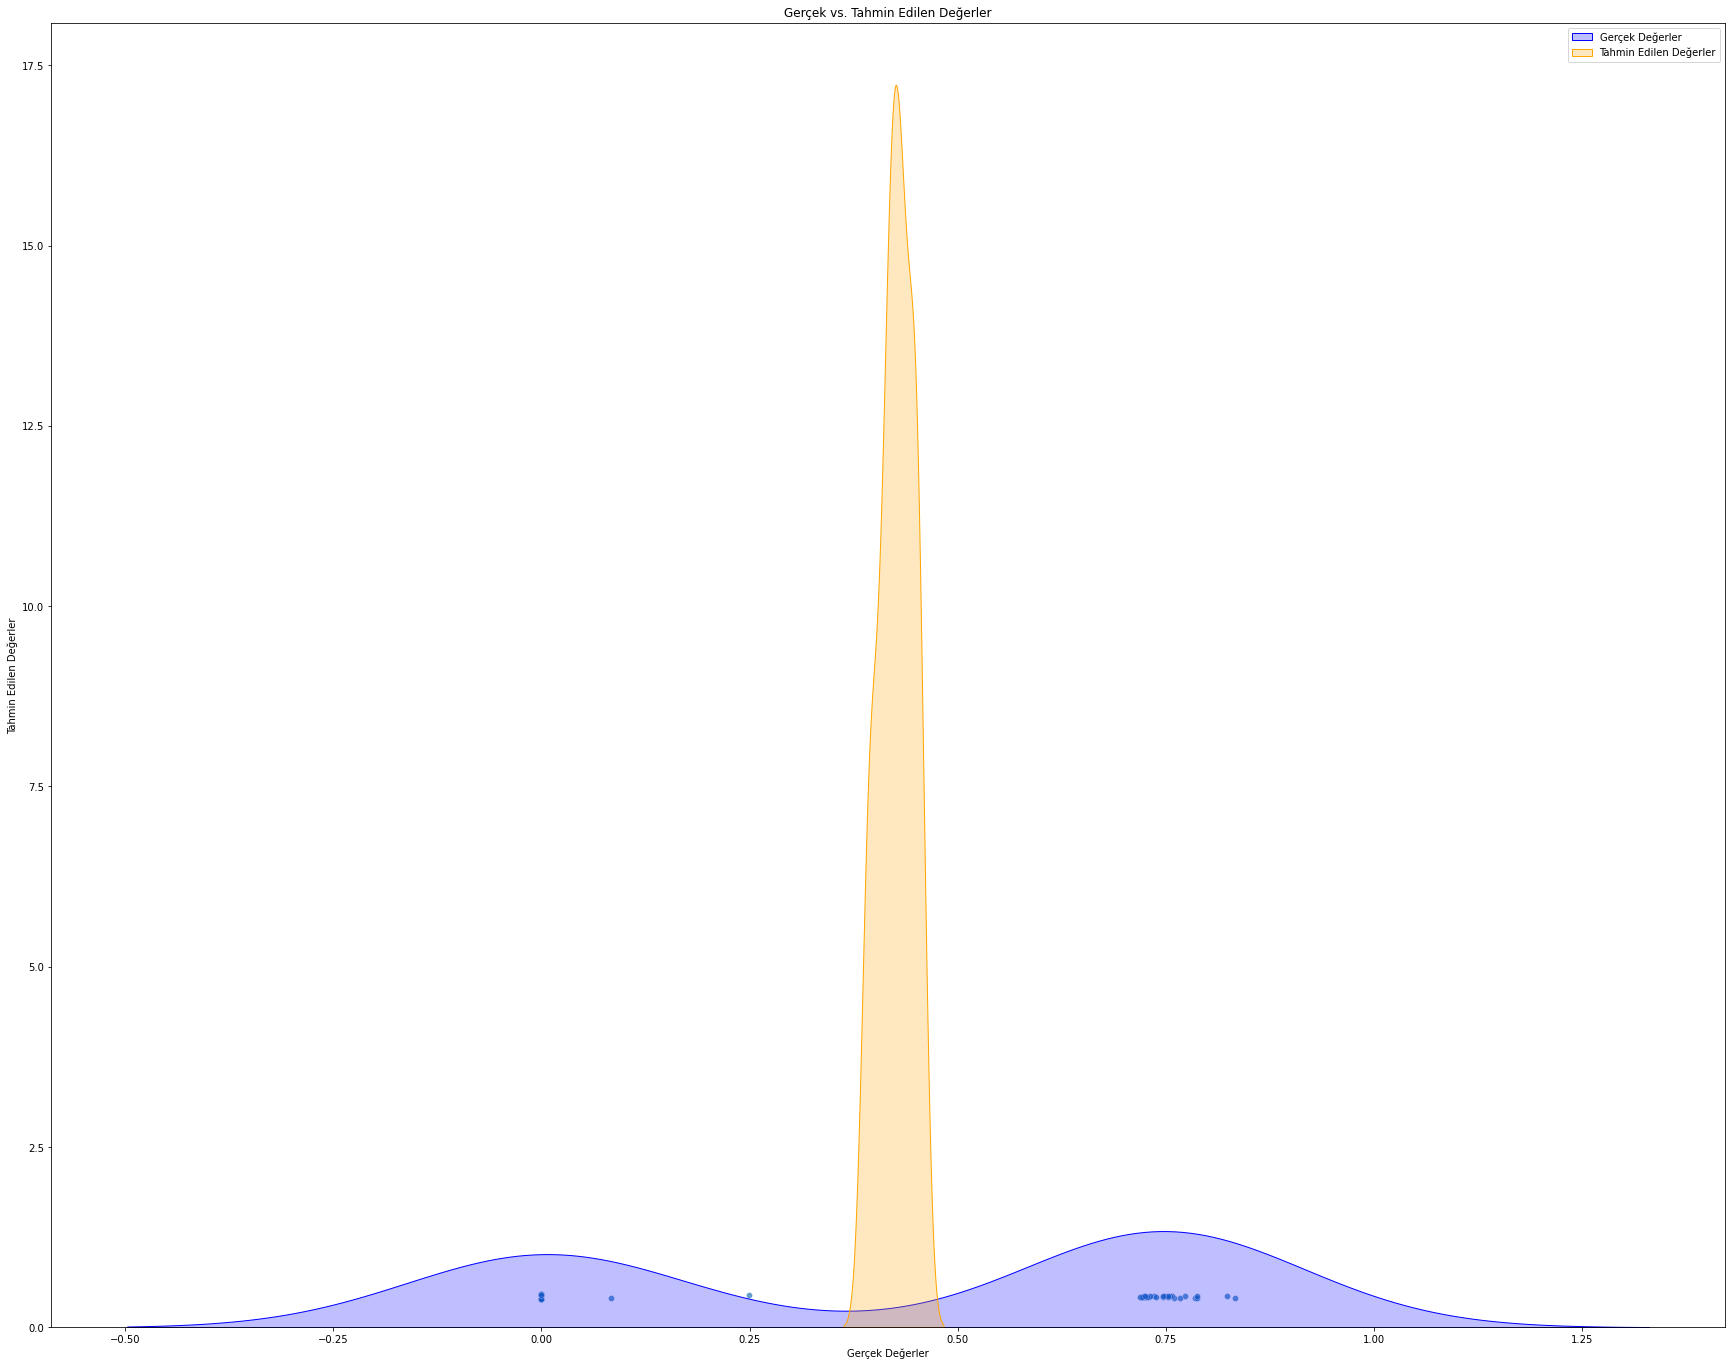

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# result_df isminde bir DataFrame oluşturulduğunu varsayalım
result_df = pd.DataFrame({'Gerçek Değerler': y_test.flatten(), 'Tahmin Edilen Değerler': y_pred.flatten()})

# Scatter plot ve yoğunluk grafiği çizimi
plt.figure(figsize=(30, 24))

# Scatter plot
sns.scatterplot(x='Gerçek Değerler', y='Tahmin Edilen Değerler', data=result_df, palette='viridis', edgecolor='w', alpha=0.7)

# Gerçek değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Gerçek Değerler'], label='Gerçek Değerler', color='blue', shade=True)

# Tahmin edilen değerlerin yoğunluk grafiği
sns.kdeplot(result_df['Tahmin Edilen Değerler'], label='Tahmin Edilen Değerler', color='orange', shade=True)

plt.title('Gerçek vs. Tahmin Edilen Değerler')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')

plt.legend()
plt.show()


Epoch 1/50
5/5 [==============================] - 0s 15ms/step - loss: 0.1341 - mae: 0.3556 - val_loss: 0.1306 - val_mae: 0.3551
Epoch 2/50
5/5 [==============================] - 0s 8ms/step - loss: 0.1344 - mae: 0.3553 - val_loss: 0.1304 - val_mae: 0.3547
Epoch 3/50
5/5 [==============================] - 0s 7ms/step - loss: 0.1345 - mae: 0.3559 - val_loss: 0.1308 - val_mae: 0.3565
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 0.1340 - mae: 0.3557 - val_loss: 0.1310 - val_mae: 0.3571
Epoch 5/50
5/5 [==============================] - 0s 7ms/step - loss: 0.1344 - mae: 0.3568 - val_loss: 0.1316 - val_mae: 0.3590
Epoch 6/50
5/5 [==============================] - 0s 9ms/step - loss: 0.1339 - mae: 0.3564 - val_loss: 0.1318 - val_mae: 0.3595
Epoch 7/50
5/5 [==============================] - 0s 7ms/step - loss: 0.1339 - mae: 0.3565 - val_loss: 0.1320 - val_mae: 0.3598
Epoch 8/50
5/5 [==============================] - 0s 8ms/step - loss: 0.1339 - mae: 0.3567 - val_loss: 

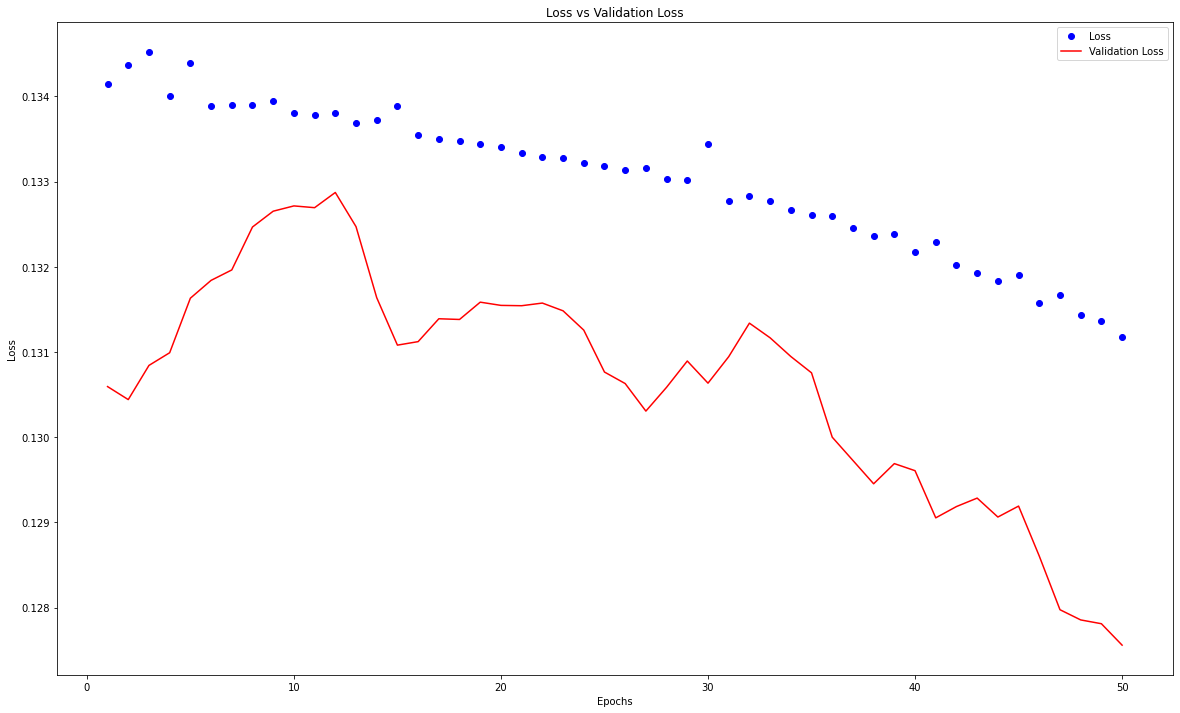

In [122]:
# Modelin eğitim sırasında kayıp (loss) ve doğrulama kaybı (validation loss) değerleri
history = mlp.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Modelin eğitim sürecindeki kayıp (loss) değerleri
loss = history.history['loss']

# Modelin eğitim sürecindeki doğrulama kaybı (validation loss) değerleri
val_loss = history.history['val_loss']

# Eğitim ve doğrulama kaybı grafiği çizimi
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(20, 12))

plt.plot(epochs, loss, 'bo', label='Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Tüm modellerin grafiklerinin karşılaştırılması

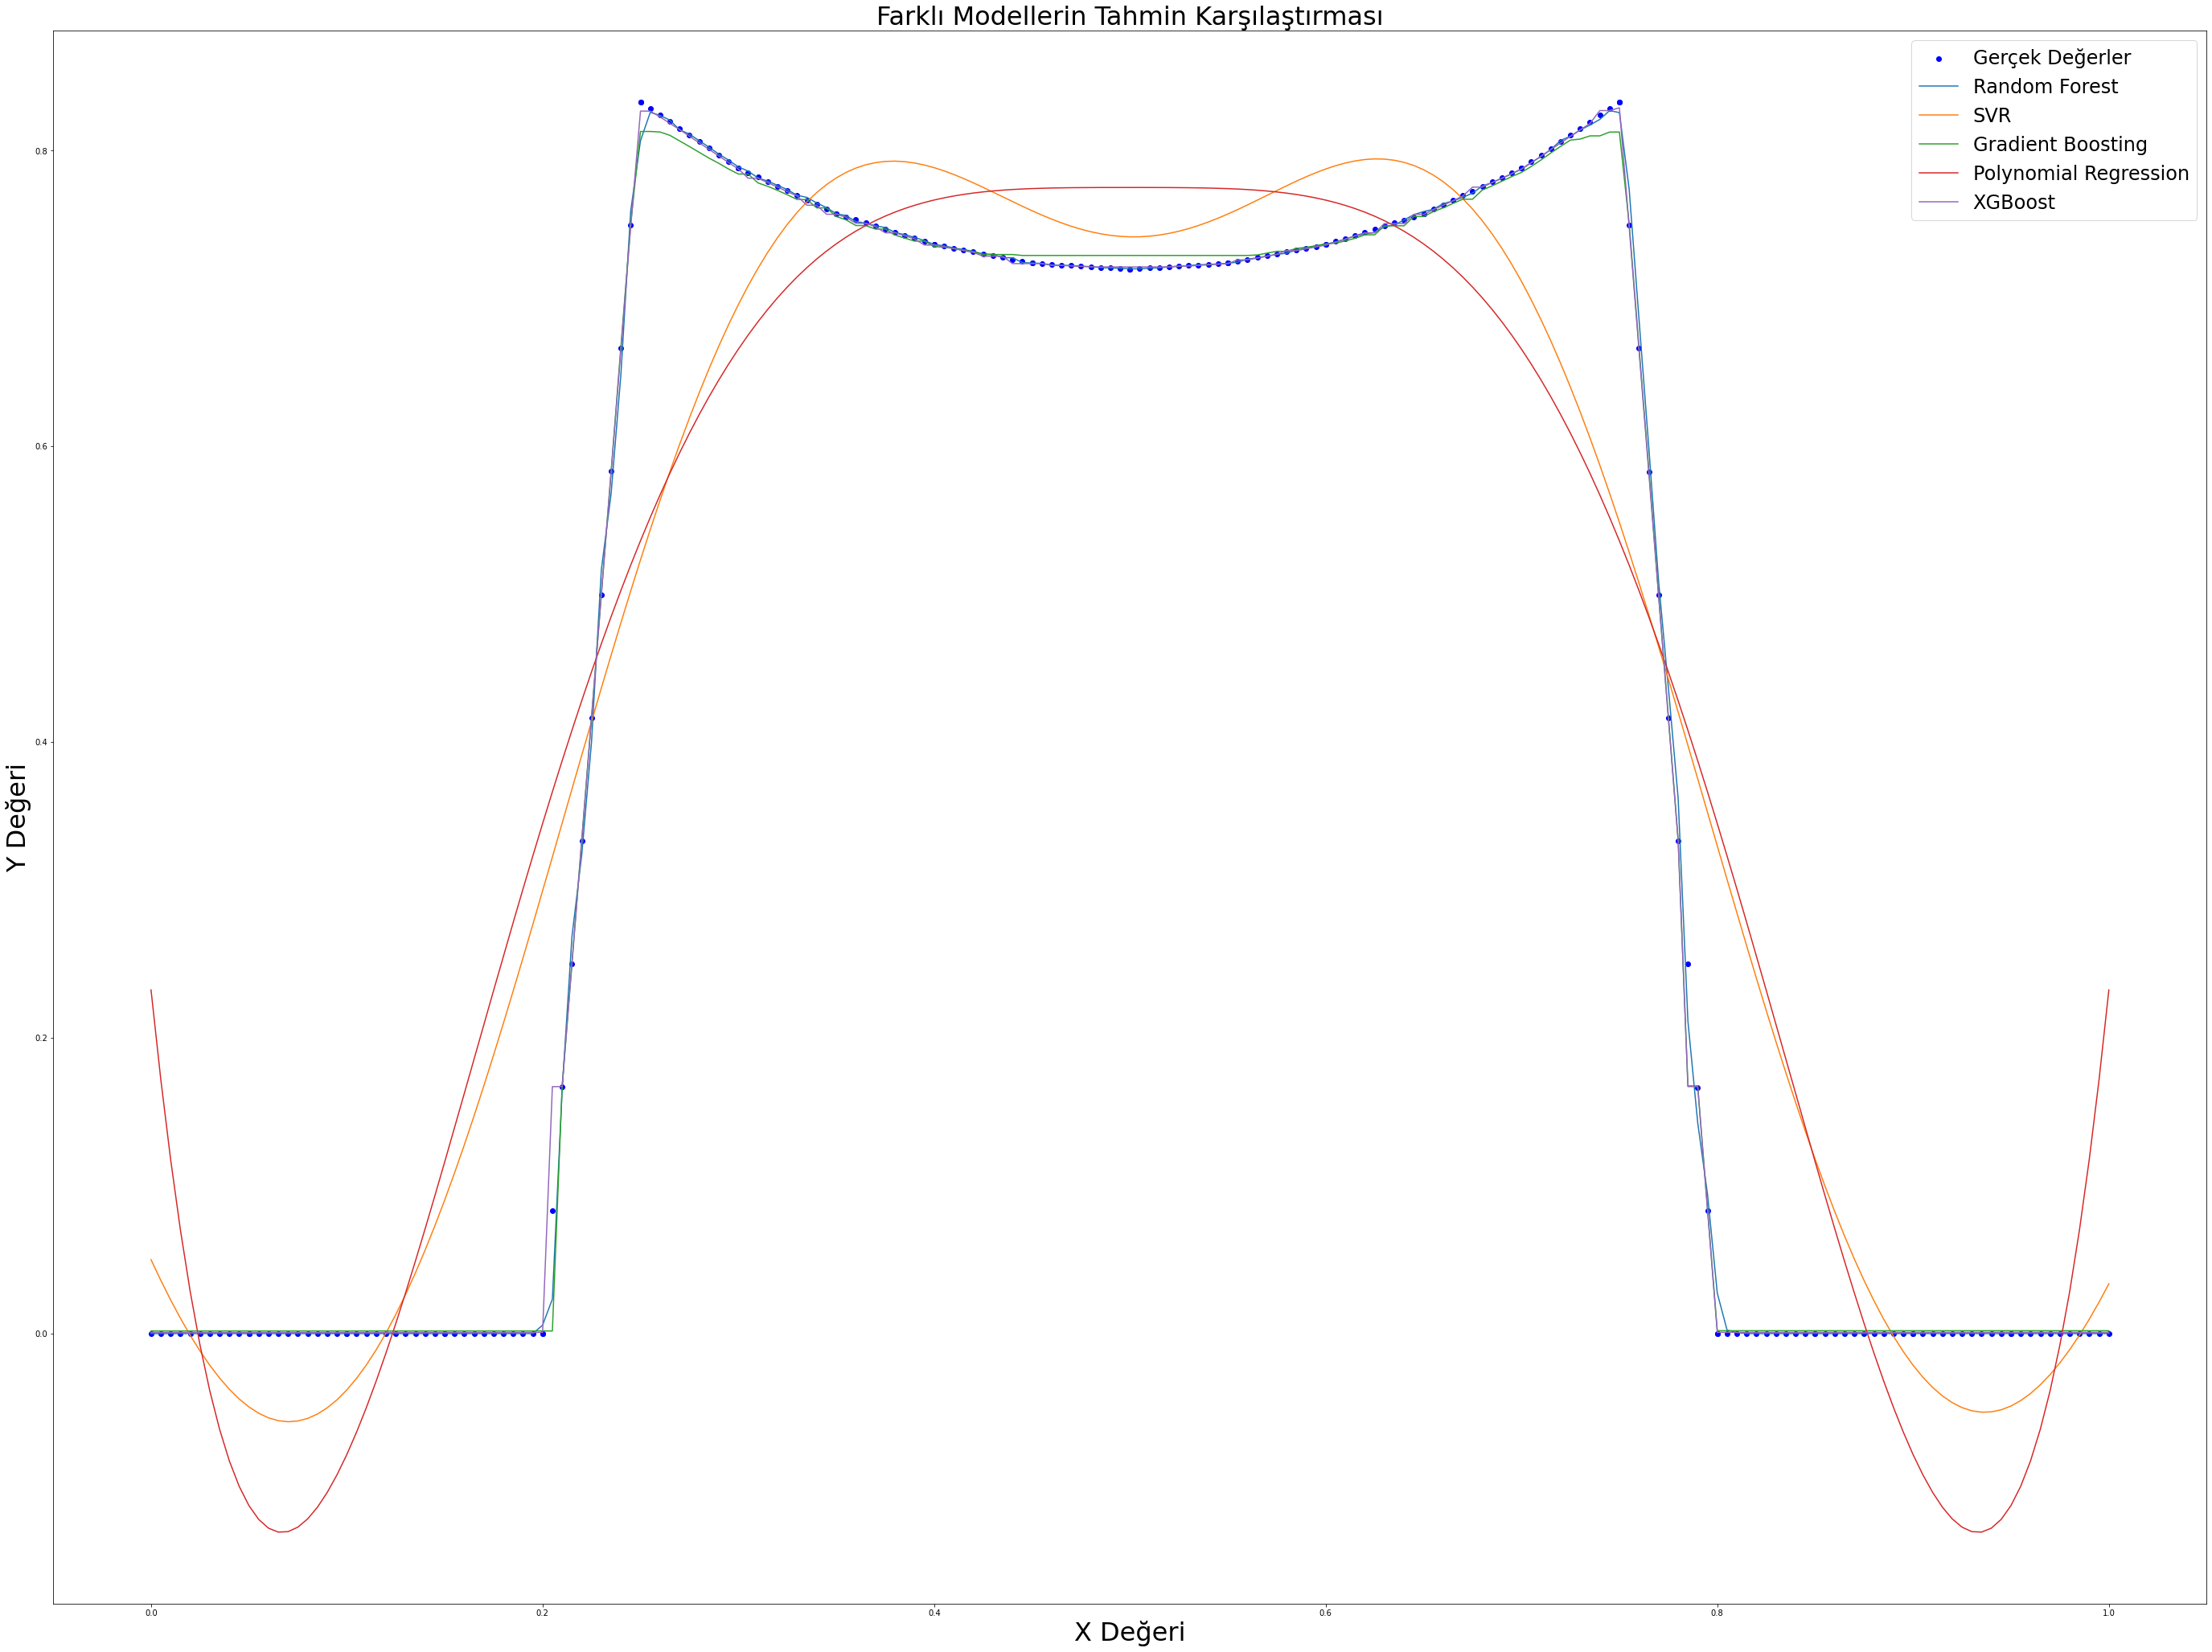

In [124]:
y_pred_rf = rf_reg.predict(X_values)
y_pred_svr = svr_reg.predict(X_values)  
y_pred_gb = gb_reg.predict(X_values)
y_pred_poly = poly_reg.predict(X_values)
y_pred_xgb = xgb.predict(X_values)

plt.figure(figsize=(48, 36))

# Gerçek değerler
plt.scatter(X, y, color='blue', label='Gerçek Değerler')

# Modellerin tahminleri
plt.plot(X_values, y_pred_rf, label='Random Forest')
plt.plot(X_values, y_pred_svr, label='SVR')
plt.plot(X_values, y_pred_gb, label='Gradient Boosting')
plt.plot(X_values, y_pred_poly, label='Polynomial Regression')
plt.plot(X_values, y_pred_xgb, label='XGBoost')

# Etiketler ve başlık
plt.xlabel('X Değeri',fontsize=32)
plt.ylabel('Y Değeri',fontsize=32)
plt.title('Farklı Modellerin Tahmin Karşılaştırması',fontsize=32)
plt.legend(fontsize=24)
plt.show()